In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [3]:
date = pd.read_csv(r"D:\C7 Input Files\dataset\dim_date.csv")
district = pd.read_csv(r"D:\C7 Input Files\dataset\dim_districts.csv")
trans = pd.read_csv(r"D:\C7 Input Files\dataset\fact_transport.csv")

In [4]:
date['month'] = pd.to_datetime(date['month'])
date['fiscal_year'] = pd.to_datetime(date['fiscal_year'].astype(str) + '-04-01')

In [5]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        48 non-null     datetime64[ns]
 1   Mmm          48 non-null     object        
 2   quarter      48 non-null     object        
 3   fiscal_year  48 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.6+ KB


In [6]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dist_code  33 non-null     object
 1   district   33 non-null     object
dtypes: object(2)
memory usage: 660.0+ bytes


In [7]:
trans

dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0         15_1  2019-04-01             17910              3011   
1         18_2  2019-04-01              3066               306   
2         20_3  2019-04-01              1577               215   
3         21_3  2019-04-01              1961               281   
4         21_7  2019-04-01              1552               309   
...        ...         ...               ...               ...   
1435      16_1  2023-03-01             24112              2169   
1436      14_4  2023-03-01               996               286   
1437      20_3  2023-03-01               886               183   
1438      23_3  2023-03-01              1659               472   
1439      18_2  2023-03-01              1767               239   

      fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                     76                22                    15308   
1                      6                 0                     2995   
2                      0                 0                     1546   
3                      2                 0                     1939   
4                      0                 0                     1512   
...                  ...               ...                      ...   
1435                2606              1848                    21501   
1436                  20                67                      884   
1437                  71                12                      828   
1438                  39                97                     1413   
1439                  32                28                     1532   

      vehicleClass_MotorCar  vehicleClass_AutoRickshaw  \
0                      4429                          0   
1                       142                         49   
2                        79                         29   
3                        72                         72   
4                        76                         69   
...                     ...                        ...   
1435                   5792                       1684   
1436                    137                         75   
1437                    146                         17   
1438                    289                         95   
1439                    251                         65   

      vehicleClass_Agriculture  vehicleClass_others  seatCapacity_1_to_3  \
0                            4                 1278                16110   
1                           64                  128                 3156   
2                           21                  117                 1683   
3                           48                  113                 2082   
4                          109                   95                 1696   
...                        ...                  ...                  ...   
1435                         0                 1758                22493   
1436                       106                  167                 1123   
1437                        54                  107                  966   
1438                       182                  288                 1829   
1439                        58                  160                 1680   

      seatCapacity_4_to_6  seatCapacity_above_6  Brand_new_vehicles  \
0                    4182                   717               19542   
1                     189                    33                3322   
2                     104                     5                1751   
3                     146                    16                2209   
4                     145                    20                1820   
...                   ...                   ...                 ...   
1435                 7139                  1093               26285   
1436                  219                    27                1300   
1437                  167                    19                1060   
1438                  391              

In [8]:
trans['month'] = pd.to_datetime(trans['month'], format='%Y-%m-%d')

In [9]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   dist_code                  1440 non-null   object        
 1   month                      1440 non-null   datetime64[ns]
 2   fuel_type_petrol           1440 non-null   int64         
 3   fuel_type_diesel           1440 non-null   int64         
 4   fuel_type_electric         1440 non-null   int64         
 5   fuel_type_others           1440 non-null   int64         
 6   vehicleClass_MotorCycle    1440 non-null   int64         
 7   vehicleClass_MotorCar      1440 non-null   int64         
 8   vehicleClass_AutoRickshaw  1440 non-null   int64         
 9   vehicleClass_Agriculture   1440 non-null   int64         
 10  vehicleClass_others        1440 non-null   int64         
 11  seatCapacity_1_to_3        1440 non-null   int64         
 12  seatCa

In [10]:
merged_dist = pd.merge(district, trans, on='dist_code', how='outer')
merged_dist

dist_code             district      month  fuel_type_petrol  \
0         19_1             Adilabad 2019-04-01            1758.0   
1         19_1             Adilabad 2019-05-01            1870.0   
2         19_1             Adilabad 2019-06-01            1384.0   
3         19_1             Adilabad 2019-07-01            1264.0   
4         19_1             Adilabad 2019-08-01            1137.0   
...        ...                  ...        ...               ...   
1438      23_3  Yadadri Bhuvanagiri 2022-11-01             852.0   
1439      23_3  Yadadri Bhuvanagiri 2022-12-01             804.0   
1440      23_3  Yadadri Bhuvanagiri 2023-01-01            1681.0   
1441      23_3  Yadadri Bhuvanagiri 2023-02-01             827.0   
1442      23_3  Yadadri Bhuvanagiri 2023-03-01            1659.0   

      fuel_type_diesel  fuel_type_electric  fuel_type_others  \
0                326.0                 0.0               2.0   
1                190.0                 0.0               9.0   
2                243.0                 0.0               2.0   
3                197.0                 0.0               9.0   
4                209.0                 1.0               4.0   
...                ...                 ...               ...   
1438             290.0                13.0              29.0   
1439             241.0                28.0              41.0   
1440             465.0                29.0              56.0   
1441             213.0                13.0              46.0   
1442             472.0                39.0              97.0   

      vehicleClass_MotorCycle  vehicleClass_MotorCar  \
0                      1697.0                  116.0   
1                      1823.0                   96.0   
2                      1352.0                  105.0   
3                      1230.0                   84.0   
4                      1103.0                   89.0   
...                       ...                    ...   
1438                    752.0                  137.0   
1439                    657.0                  213.0   
1440                   1489.0                  253.0   
1441                    702.0                  145.0   
1442                   1413.0                  289.0   

      vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                          77.0                      13.0   
1                          71.0                       6.0   
2                          93.0                       0.0   
3                          72.0                      10.0   
4                          71.0                       6.0   
...                         ...                       ...   
1438                       21.0                     146.0   
1439                       32.0                      61.0   
1440                       63.0                     148.0   
1441                       50.0                      69.0   
1442                       95.0                     182.0   

      vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                   183.0               1823.0                184.0   
1                    73.0               1883.0                159.0   
2                    79.0               1399.0                186.0   
3                    74.0               1299.0                151.0   
4                    82.0               1181.0                145.0   
...                   ...                  ...                  ...   
1438                128.0               1013.0                150.0   
1439                151.0                849.0                221.0   
1440                278.0               1899.0                300.0   
1441                133.0                888.0                185.0   
1442                288.0               1829.0                391.0   

      seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                     79.0              2061.0                25.0   
1                   

In [11]:
# Second merge
merge_trans = merged_dist.merge(date, on='month', how='outer')

In [12]:
merge_trans

dist_code              district      month  fuel_type_petrol  \
0         19_1              Adilabad 2019-04-01            1758.0   
1         22_2  Bhadradri Kothagudem 2019-04-01            3527.0   
2         16_1             Hyderabad 2019-04-01           24309.0   
3         20_2               Jagtial 2019-04-01            2786.0   
4         21_3               Jangoan 2019-04-01            1961.0   
...        ...                   ...        ...               ...   
1438      21_2              Warangal 2023-03-01            1832.0   
1439      23_3   Yadadri Bhuvanagiri 2023-03-01            1659.0   
1440      21_1           Hanumakonda        NaT               NaN   
1441      21_6                Mulugu        NaT               NaN   
1442      14_5            Narayanpet        NaT               NaN   

      fuel_type_diesel  fuel_type_electric  fuel_type_others  \
0                326.0                 0.0               2.0   
1                669.0                 2.0               4.0   
2               2957.0               284.0            1540.0   
3                440.0                 2.0               0.0   
4                281.0                 2.0               0.0   
...                ...                 ...               ...   
1438             269.0               107.0              82.0   
1439             472.0                39.0              97.0   
1440               NaN                 NaN               NaN   
1441               NaN                 NaN               NaN   
1442               NaN                 NaN               NaN   

      vehicleClass_MotorCycle  vehicleClass_MotorCar  \
0                      1697.0                  116.0   
1                      3409.0                  234.0   
2                     22081.0                 3749.0   
3                      2720.0                  135.0   
4                      1939.0                   72.0   
...                       ...                    ...   
1438                   1647.0                  311.0   
1439                   1413.0                  289.0   
1440                      NaN                    NaN   
1441                      NaN                    NaN   
1442                      NaN                    NaN   

      vehicleClass_AutoRickshaw  ...  seatCapacity_1_to_3  \
0                          77.0  ...               1823.0   
1                         231.0  ...               3683.0   
2                        1518.0  ...              23082.0   
3                         106.0  ...               2951.0   
4                          72.0  ...               2082.0   
...                         ...  ...                  ...   
1438                      116.0  ...               1814.0   
1439                       95.0  ...               1829.0   
1440                        NaN  ...                  NaN   
1441                        NaN  ...                  NaN   
1442                        NaN  ...                  NaN   

      seatCapacity_4_to_6  seatCapacity_above_6  Brand_new_vehicles  \
0                   184.0                  79.0              2061.0   
1                   467.0                  52.0              4096.0   
2                  5306.0                 698.0             27121.0   
3                   245.0                  30.0              3120.0   
4                   146.0                  16.0              2209.0   
...                   ...                   ...                 ...   
1438                395.0                  83.0              2047.0   
1439                391.0                  47.0              2107.0   
1440                  NaN                   NaN                 NaN   
1441                  NaN                   NaN                 NaN   
1442                  NaN                   NaN                 NaN   

      Pre-owned_vehicles  category_Non-Transport  category_Transport  Mmm  \
0                   25.0                  1832.0               254.0  A

In [13]:
merge_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   dist_code                  1443 non-null   object        
 1   district                   1443 non-null   object        
 2   month                      1440 non-null   datetime64[ns]
 3   fuel_type_petrol           1440 non-null   float64       
 4   fuel_type_diesel           1440 non-null   float64       
 5   fuel_type_electric         1440 non-null   float64       
 6   fuel_type_others           1440 non-null   float64       
 7   vehicleClass_MotorCycle    1440 non-null   float64       
 8   vehicleClass_MotorCar      1440 non-null   float64       
 9   vehicleClass_AutoRickshaw  1440 non-null   float64       
 10  vehicleClass_Agriculture   1440 non-null   float64       
 11  vehicleClass_others        1440 non-null   float64       
 12  seatCa

In [14]:
merge_trans.isna().sum()

dist_code                    0
district                     0
month                        3
fuel_type_petrol             3
fuel_type_diesel             3
fuel_type_electric           3
fuel_type_others             3
vehicleClass_MotorCycle      3
vehicleClass_MotorCar        3
vehicleClass_AutoRickshaw    3
vehicleClass_Agriculture     3
vehicleClass_others          3
seatCapacity_1_to_3          3
seatCapacity_4_to_6          3
seatCapacity_above_6         3
Brand_new_vehicles           3
Pre-owned_vehicles           3
category_Non-Transport       3
category_Transport           3
Mmm                          3
quarter                      3
fiscal_year                  3
dtype: int64

In [15]:
merge_trans = merge_trans.dropna()

In [16]:
merge_trans.duplicated().sum()

0

In [17]:
# Calculate average fuel consumption proportions across the entire dataset
average_fuel_consumption = merge_trans[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']].mean()

In [18]:
average_fuel_consumption

fuel_type_petrol      3835.600694
fuel_type_diesel       659.294444
fuel_type_electric      71.985417
fuel_type_others        62.131250
dtype: float64

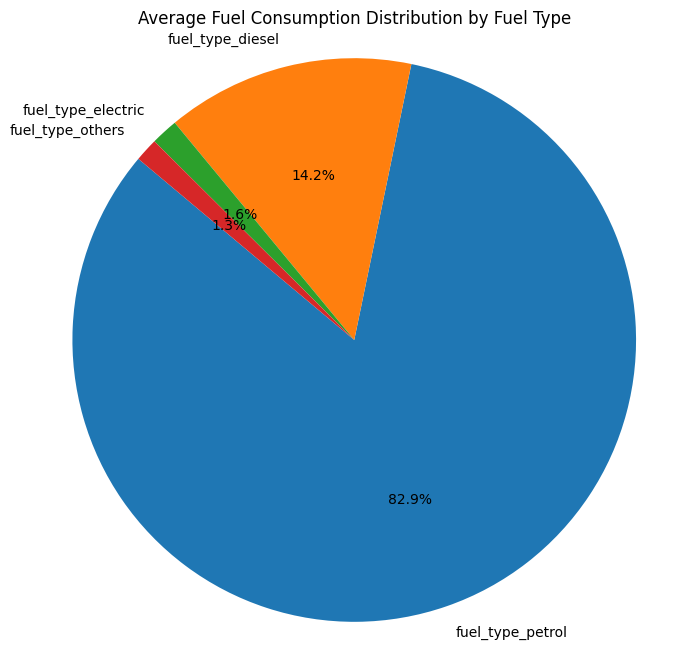

In [19]:
# Create a pie chart to visualize fuel consumption distribution
plt.figure(figsize=(8, 8))
plt.pie(average_fuel_consumption, labels=average_fuel_consumption.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Fuel Consumption Distribution by Fuel Type')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [20]:
# Group data by quarter or fiscal year and calculate average fuel consumption proportions
grouped_data = merge_trans.groupby('fiscal_year')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']].mean()


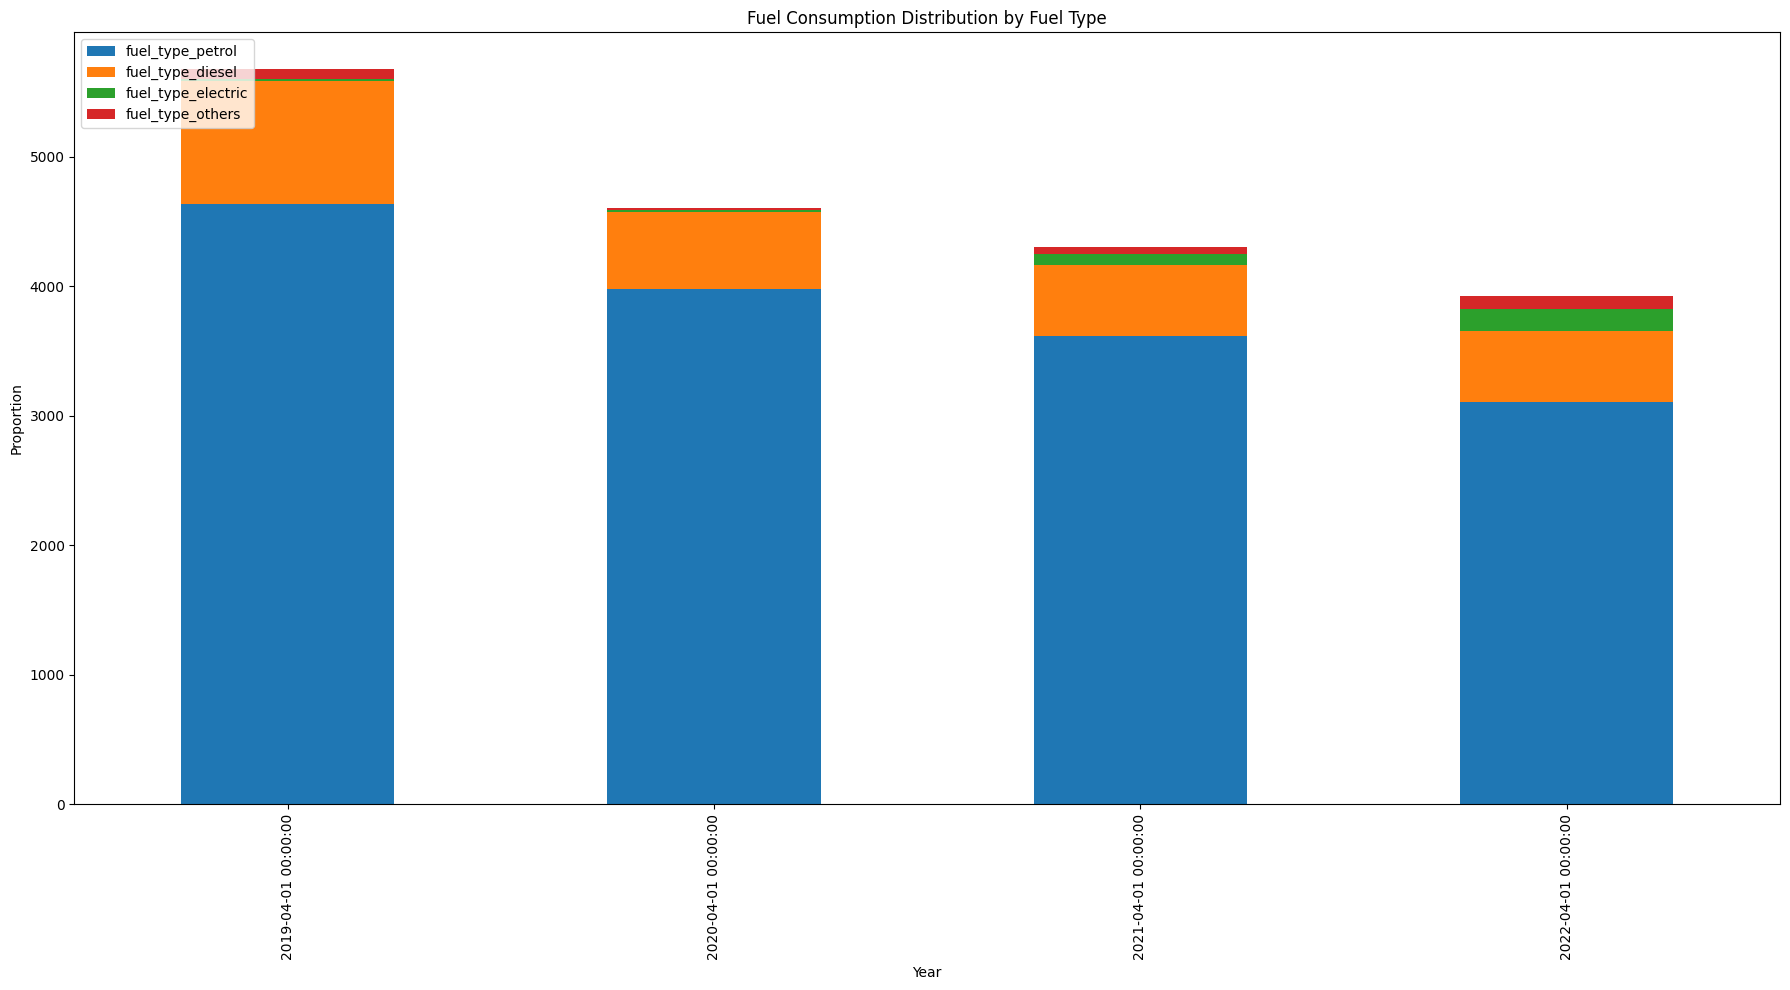

In [21]:
# Create stacked bar charts to visualize fuel consumption distribution for each quarter or fiscal year
grouped_data.plot(kind='bar', stacked=True,figsize=(18, 10))
plt.title('Fuel Consumption Distribution by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

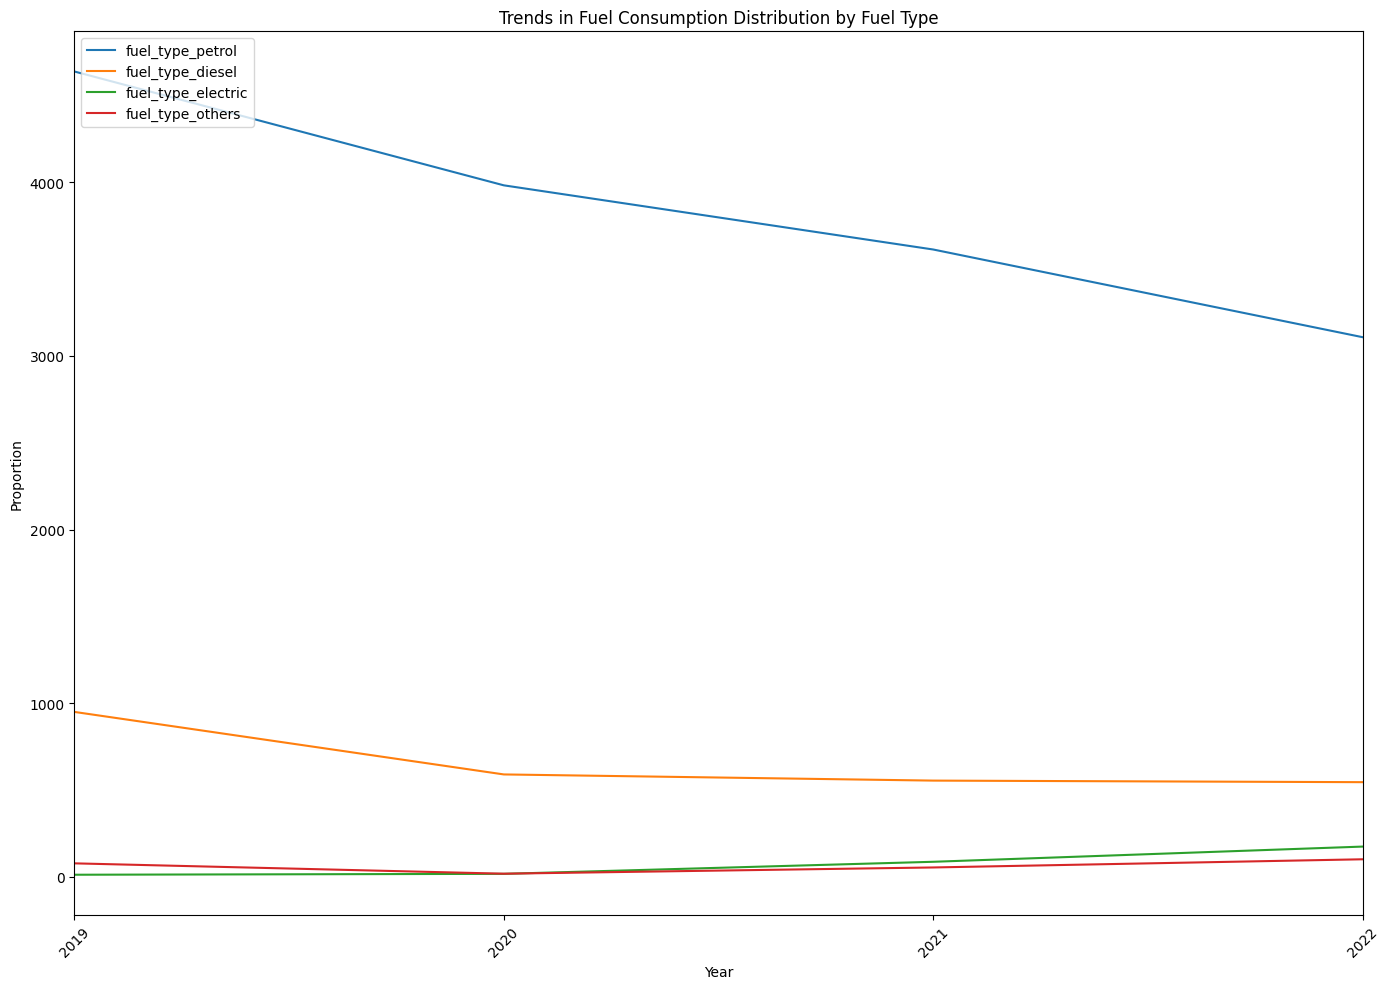

In [22]:
# Create line charts to visualize trends in fuel consumption distribution
grouped_data.plot(kind='line',figsize=(14, 10))
plt.title('Trends in Fuel Consumption Distribution by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [23]:
# Group data by district and calculate total fuel consumption for each fuel type
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']
fuel_consumption_by_district = merge_trans.groupby('district')[fuel_types].sum()

In [24]:
fuel_consumption_by_district

fuel_type_petrol  fuel_type_diesel  \
district                                                      
Adilabad                          66786.0           11764.0   
Bhadradri Kothagudem             117663.0           27885.0   
Hyderabad                        976654.0           93133.0   
Jagtial                          108718.0           16428.0   
Jangoan                           59016.0           14519.0   
Jayashankar Bhupalpally           65806.0           17308.0   
Jogulamba Gadwal                  67136.0           10480.0   
Kamareddy                        111059.0           16644.0   
Karimnagar                       124566.0           31057.0   
Khammam                          177686.0           37384.0   
Kumurambheem Asifabad             39345.0            8488.0   
Mahabubabad                       78294.0           18472.0   
Mahabubnagar                     138492.0           29752.0   
Mancherial                        79024.0           16512.0   
Medak                             76404.0           20583.0   
Medchal_Malkajgiri               840822.0          121602.0   
Nagarkurnool                      81040.0           24542.0   
Nalgonda                         178887.0           44328.0   
Nirmal                            79081.0           13866.0   
Nizamabad                        200091.0           31493.0   
Peddapalli                        76602.0           15181.0   
Rajanna Sircilla                  59700.0           11754.0   
Rangareddy                       786086.0          111061.0   
Sangareddy                       221583.0           41543.0   
Siddipet                         114141.0           25756.0   
Suryapet                         125645.0           36488.0   
Vikarabad                        138520.0           32661.0   
Wanaparthy                        59250.0           13121.0   
Warangal                         184016.0           32524.0   
Yadadri Bhuvanagiri               91152.0           23055.0   

                         fuel_type_electric  fuel_type_others  
district                                                       
Adilabad                              647.0             120.0  
Bhadradri Kothagudem                  396.0             841.0  
Hyderabad                           32012.0           41680.0  
Jagtial                              1147.0             249.0  
Jangoan                               266.0             488.0  
Jayashankar Bhupalpally               353.0             165.0  
Jogulamba Gadwal                      165.0              59.0  
Kamareddy                             580.0             365.0  
Karimnagar                           1902.0            1299.0  
Khammam                               969.0            3804.0  
Kumurambheem Asifabad                 139.0              38.0  
Mahabubabad                           158.0             636.0  
Mahabubnagar                          963.0             745.0  
Mancherial                            523.0             241.0  
Medak                                 551.0            1148.0  
Medchal_Malkajgiri                  22846.0            7107.0  
Nagarkurnool                          311.0             250.0  
Nalgonda                             1016.0            3881.0  
Nirmal                               1129.0             429.0  
Nizamabad                            3609.0             916.0  
Peddapalli                            686.0             239.0  
Rajanna Sircilla                      888.0             134.0  
Rangareddy                          21755.0            7731.0  
Sangareddy                           5170.0            7031.0  
Siddipet                             1352.0            1595.0  
Suryapet                              930.0             944.0  
Vikarabad                            1067.0            1600.0  
Wanaparthy                            340.0             232.0  
Warangal                             1256.0            1645.0  
Yadadri Bhuvanagiri     

<Figure size 1200x600 with 0 Axes>

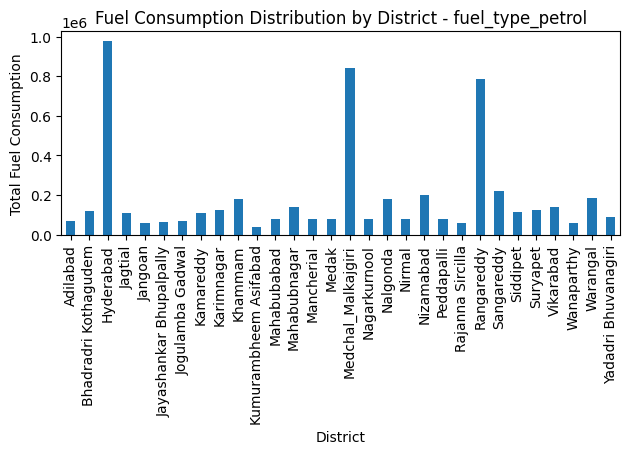

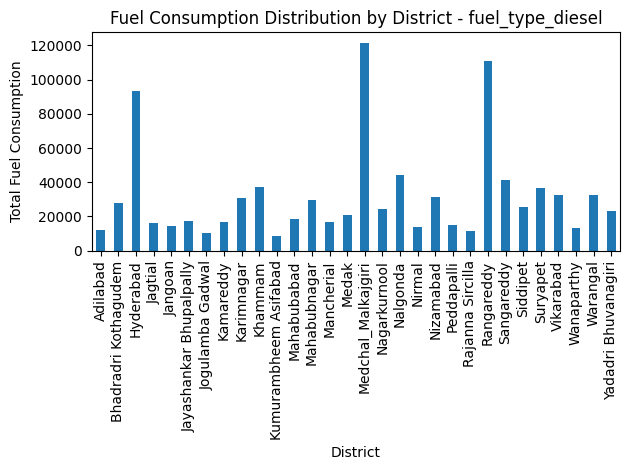

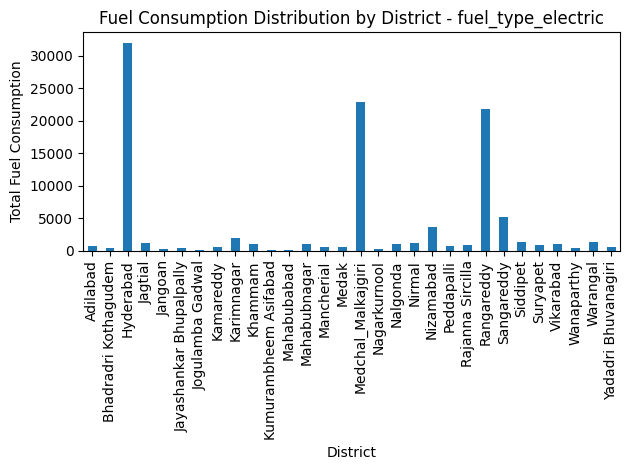

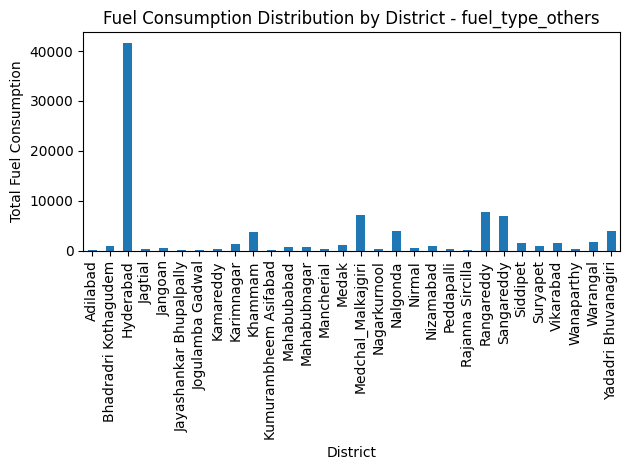

In [25]:
# Create bar charts to visualize fuel consumption across districts for each fuel type
plt.figure(figsize=(12, 6))

for fuel_type in fuel_types:
    fuel_consumption_by_district.plot(kind='bar', y=fuel_type, legend=False)
    plt.title(f'Fuel Consumption Distribution by District - {fuel_type}')
    plt.xlabel('District')
    plt.ylabel('Total Fuel Consumption')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [26]:
# Group data by district and fiscal year, and calculate total fuel consumption
grouped_data = merge_trans.groupby(['district', 'fiscal_year'])[
    ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']
].sum()

In [27]:
# Calculate total counts of each vehicle class
vehicle_class_counts = merge_trans[[
    'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
    'vehicleClass_Agriculture', 'vehicleClass_others'
]].sum()

In [28]:
vehicle_class_counts

vehicleClass_MotorCycle      4809987.0
vehicleClass_MotorCar        1036430.0
vehicleClass_AutoRickshaw     135145.0
vehicleClass_Agriculture      195714.0
vehicleClass_others           488632.0
dtype: float64

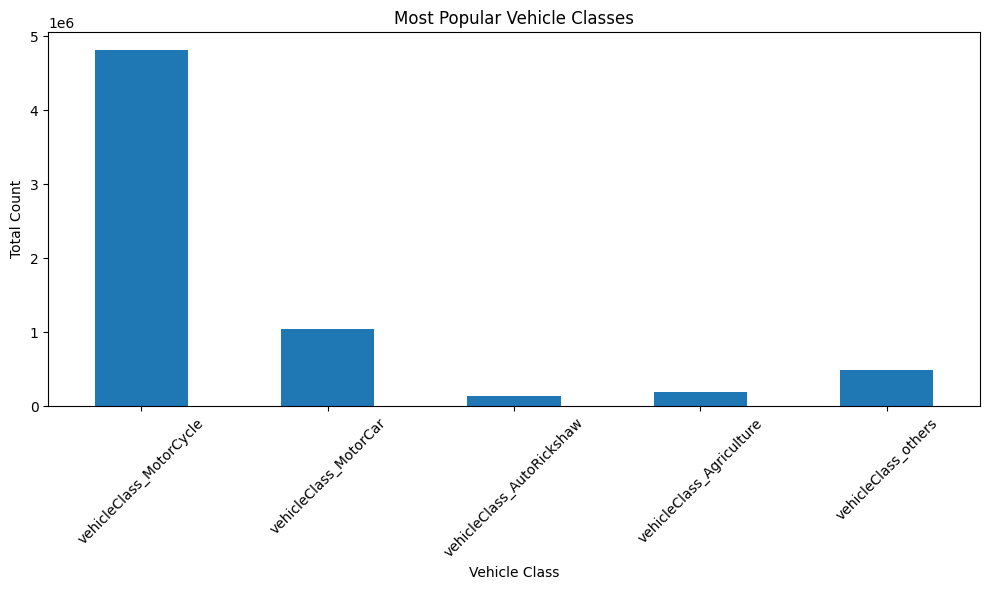

In [192]:
# Create a bar chart to visualize the popularity of each vehicle class
plt.figure(figsize=(10, 6))
vehicle_class_counts.plot(kind='bar')
plt.title('Most Popular Vehicle Classes')
plt.xlabel('Vehicle Class')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Group data by fiscal year and vehicle class, and calculate total counts
grouped_data = merge_trans.groupby(['fiscal_year', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 
                           'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 
                           'vehicleClass_others']).size().reset_index(name='count')


In [ ]:
# Filter out rows with zero counts for cleaner visualization
grouped_data = grouped_data[grouped_data['count'] > 0]

In [ ]:
import geopandas as gpd

In [ ]:
# Load geospatial data (GeoDataFrame)
districts_geo = gpd.read_file(r'D:\C7 Input Files\telangana_district_map.json')

In [ ]:
districts_geo.rename(columns={'Dist_Name': 'district'}, inplace=True)

In [ ]:
# Merge vehicle class data with geospatial data
merged_data = districts_geo.merge(merge_trans, on='district', how='left')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24136\3785986315.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


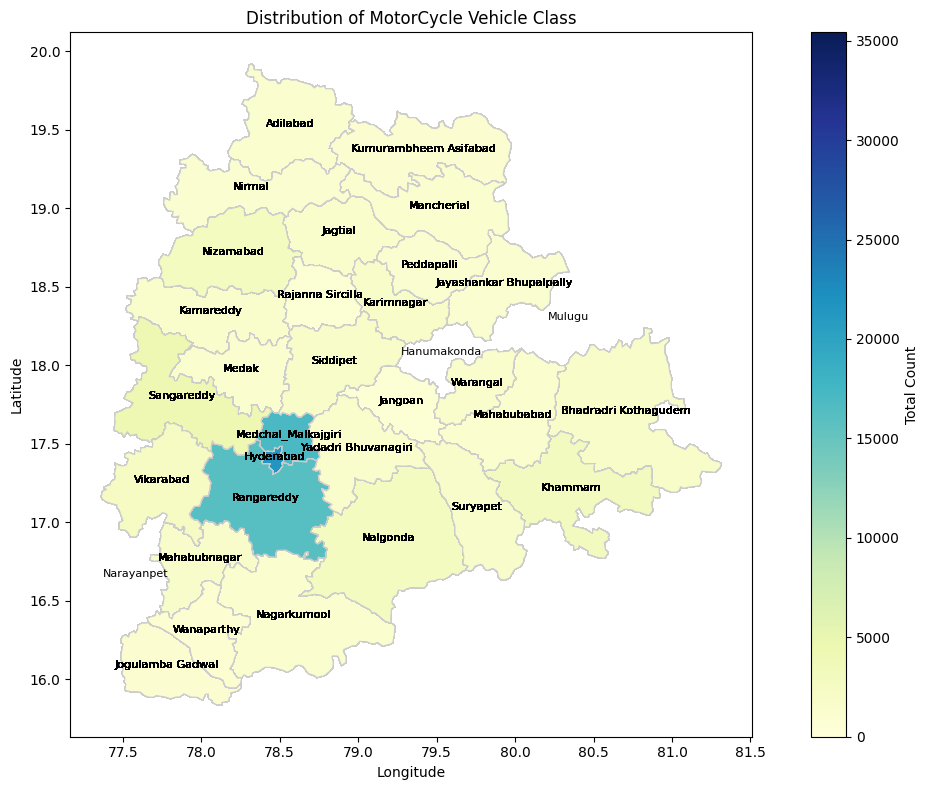

In [ ]:
# Specify the vehicle classes you want to visualize
vehicle_class_columns = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 
                         'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 
                         'vehicleClass_others']

# Create a choropleth map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column=vehicle_class_columns[0], cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Distribution of MotorCycle Vehicle Class')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Add a legend
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=merged_data[vehicle_class_columns[0]].min(), vmax=merged_data[vehicle_class_columns[0]].max()))
sm._A = []
merged_data.apply(lambda x: ax.annotate(text=x.district, xy=x.geometry.centroid.coords[0], fontsize=8, ha='center'), axis=1)

cbar = plt.colorbar(sm)
cbar.set_label('Total Count')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24136\2318270729.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


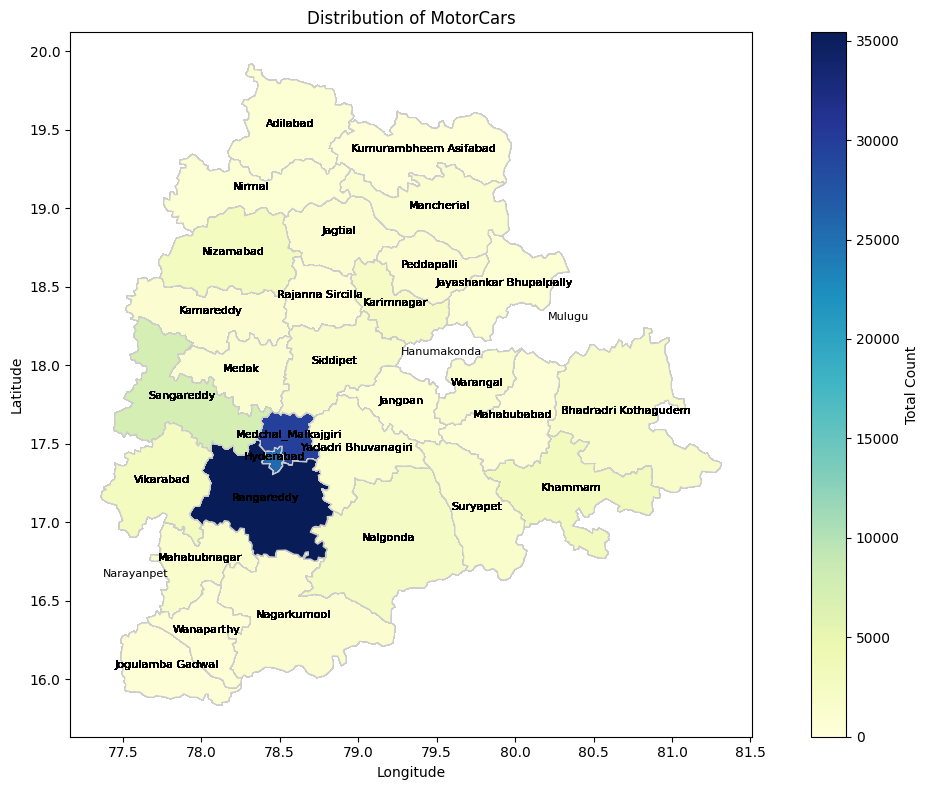

In [ ]:
# Create a choropleth map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column=vehicle_class_columns[1], cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Distribution of MotorCars')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Add a legend
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=merged_data[vehicle_class_columns[0]].min(), vmax=merged_data[vehicle_class_columns[0]].max()))
sm._A = []
merged_data.apply(lambda x: ax.annotate(text=x.district, xy=x.geometry.centroid.coords[0], fontsize=8, ha='center'), axis=1)

cbar = plt.colorbar(sm)
cbar.set_label('Total Count')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24136\1453994453.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


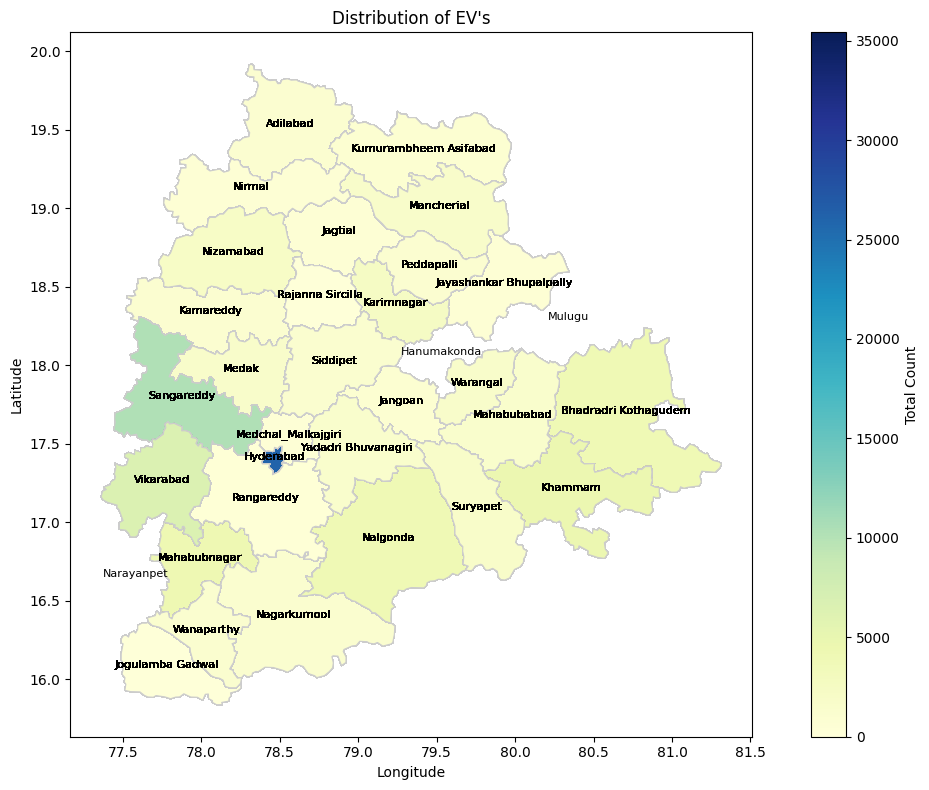

In [ ]:
# Create a choropleth map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column=vehicle_class_columns[2], cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title("Distribution of EV's")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Add a legend
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=merged_data[vehicle_class_columns[0]].min(), vmax=merged_data[vehicle_class_columns[0]].max()))
sm._A = []
merged_data.apply(lambda x: ax.annotate(text=x.district, xy=x.geometry.centroid.coords[0], fontsize=8, ha='center'), axis=1)

cbar = plt.colorbar(sm)
cbar.set_label('Total Count')

plt.show()

In [ ]:
# Calculate frequencies of each seat capacity range
seat_capacity_ranges = ['seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6']

# Calculate the sum of counts for each seat capacity range across all districts
seat_capacity_counts = merge_trans[seat_capacity_ranges].sum()


In [ ]:
seat_capacity_counts

seatCapacity_1_to_3     5400744.0
seatCapacity_4_to_6     1106950.0
seatCapacity_above_6     155794.0
dtype: float64

In [ ]:
# Identify the most common seat capacity range
most_common_range = seat_capacity_counts.idxmax()
most_common_range

'seatCapacity_1_to_3'

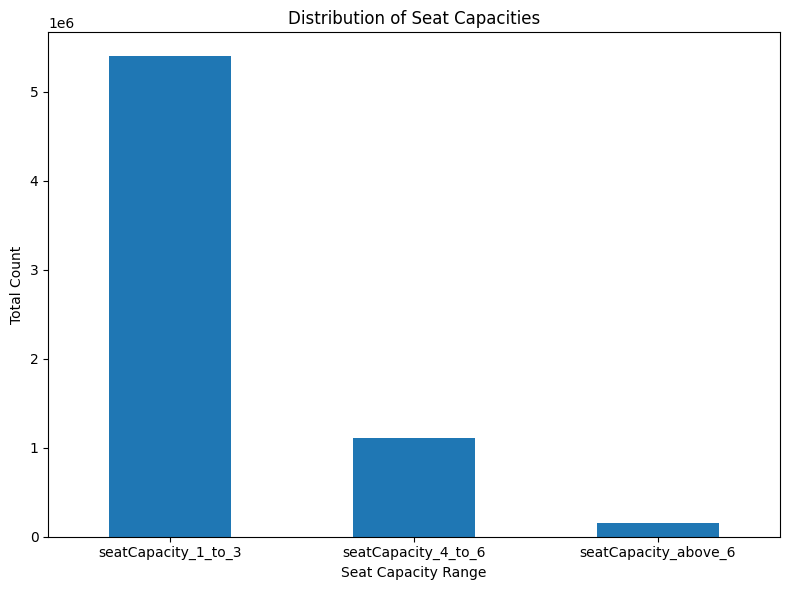

In [ ]:
# Create a bar chart to visualize the distribution of seat capacities
plt.figure(figsize=(8, 6))
seat_capacity_counts.plot(kind='bar')
plt.title('Distribution of Seat Capacities')
plt.xlabel('Seat Capacity Range')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Group data by district and calculate the sum of seat capacities from FY 2019 to FY 2022
district_grouped = merge_trans.groupby('district')[['seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6']].sum()

In [ ]:
district_grouped

seatCapacity_1_to_3  seatCapacity_4_to_6  \
district                                                            
Adilabad                             70397.0               7990.0   
Bhadradri Kothagudem                124468.0              19742.0   
Hyderabad                           894920.0             217392.0   
Jagtial                             114658.0              10670.0   
Jangoan                              67413.0               6009.0   
Jayashankar Bhupalpally              75210.0               7387.0   
Jogulamba Gadwal                     73038.0               4118.0   
Kamareddy                           115911.0              10830.0   
Karimnagar                          130496.0              24344.0   
Khammam                             185972.0              29849.0   
Kumurambheem Asifabad                43515.0               3967.0   
Mahabubabad                          88535.0               7534.0   
Mahabubnagar                        148064.0              19378.0   
Mancherial                           81611.0              12816.0   
Medak                                86242.0              11192.0   
Medchal_Malkajgiri                  743317.0             215835.0   
Nagarkurnool                         95437.0               9565.0   
Nalgonda                            197997.0              26457.0   
Nirmal                               84696.0               8766.0   
Nizamabad                           204507.0              28404.0   
Peddapalli                           79276.0              11633.0   
Rajanna Sircilla                     65805.0               5954.0   
Rangareddy                          653620.0             238375.0   
Sangareddy                          208982.0              58966.0   
Siddipet                            126008.0              14731.0   
Suryapet                            145693.0              14420.0   
Vikarabad                           141333.0              29761.0   
Wanaparthy                           65798.0               6378.0   
Warangal                            187624.0              27960.0   
Yadadri Bhuvanagiri                 100201.0              16527.0   

                         seatCapacity_above_6  
district                                       
Adilabad                                929.0  
Bhadradri Kothagudem                   2539.0  
Hyderabad                             31009.0  
Jagtial                                1202.0  
Jangoan                                 869.0  
Jayashankar Bhupalpally                1014.0  
Jogulamba Gadwal                        668.0  
Kamareddy                              1902.0  
Karimnagar                             3917.0  
Khammam                                4005.0  
Kumurambheem Asifabad                   513.0  
Mahabubabad                            1481.0  
Mahabubnagar                           2455.0  
Mancherial                             1846.0  
Medak                                  1249.0  
Medchal_Malkajgiri                    32416.0  
Nagarkurnool                           1126.0  
Nalgonda                               3639.0  
Nirmal                                 1041.0  
Nizamabad                              3178.0  
Peddapalli                             1797.0  
Rajanna Sircilla                        715.0  
Rangareddy                            33877.0  
Sangareddy                             7230.0  
Siddipet                               2108.0  
Suryapet                               3846.0  
Vikarabad                              2758.0  
Wanaparthy                              747.0  
Warangal                               3839.0  
Yadadri Bhuvanagiri                    1879.0

In [ ]:
# Group data by district and fiscal year, and calculate the sum of seat capacities
district_year_grouped = merge_trans.groupby(['district', 'fiscal_year'])[
    ['seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6']
].sum()

In [ ]:
unique_districts = district_year_grouped.index.get_level_values('district').unique()

In [ ]:
unique_districts

Index(['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial', 'Jangoan',
       'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Kamareddy',
       'Karimnagar', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubabad',
       'Mahabubnagar', 'Mancherial', 'Medak', 'Medchal_Malkajgiri',
       'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Suryapet',
       'Vikarabad', 'Wanaparthy', 'Warangal', 'Yadadri Bhuvanagiri'],
      dtype='object', name='district')

<Figure size 1000x600 with 0 Axes>

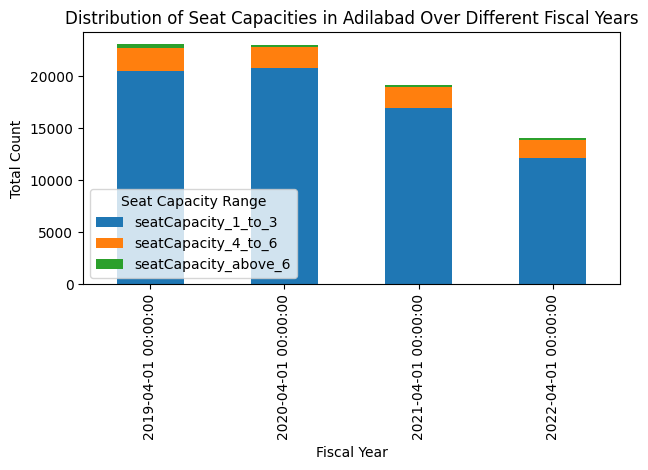

<Figure size 1000x600 with 0 Axes>

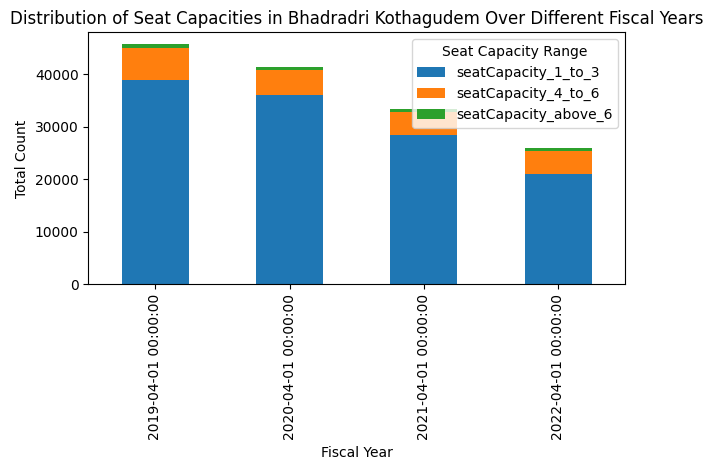

<Figure size 1000x600 with 0 Axes>

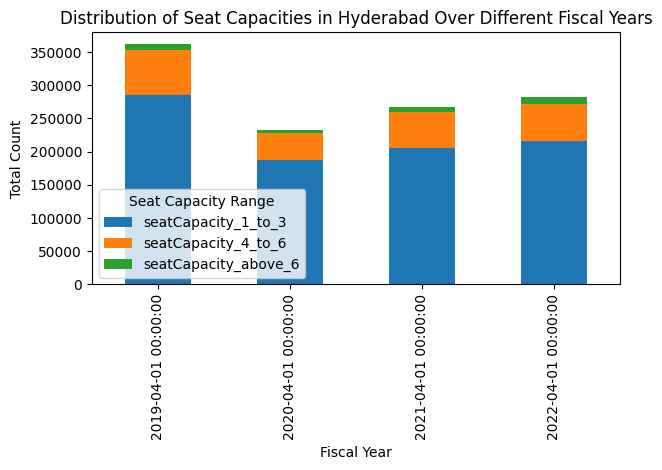

<Figure size 1000x600 with 0 Axes>

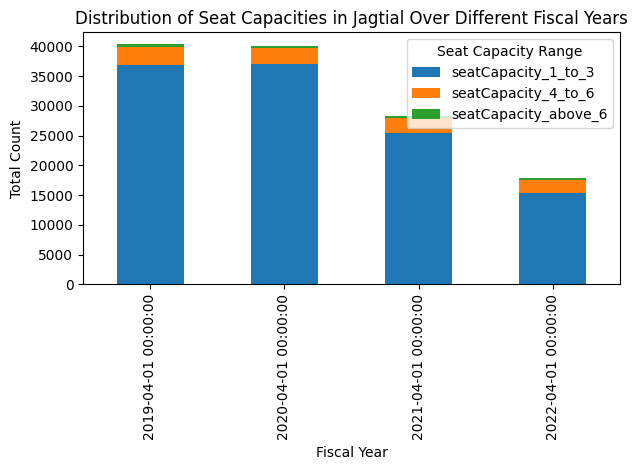

<Figure size 1000x600 with 0 Axes>

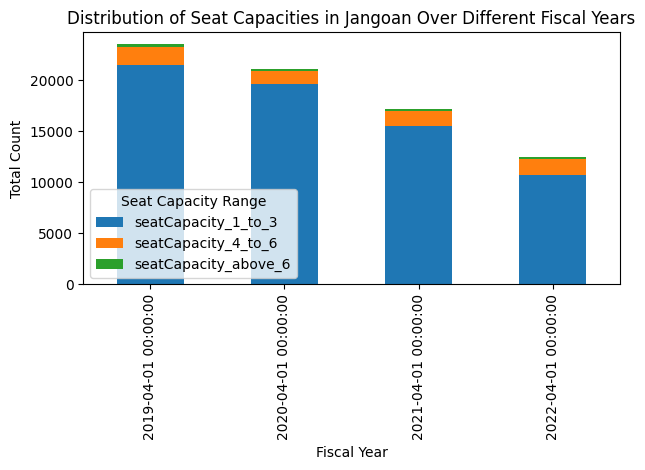

<Figure size 1000x600 with 0 Axes>

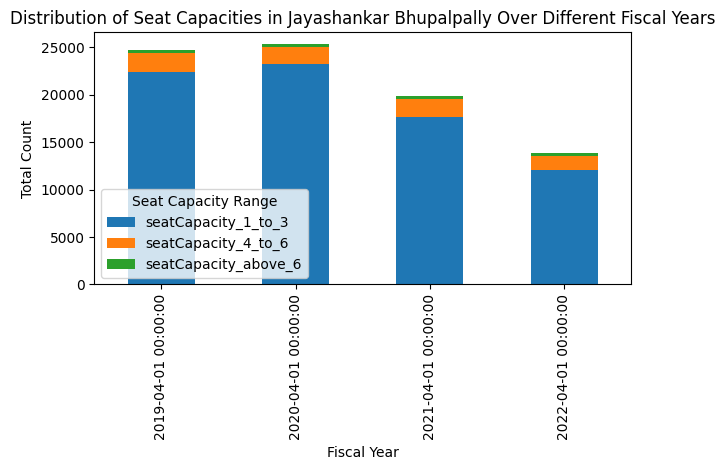

<Figure size 1000x600 with 0 Axes>

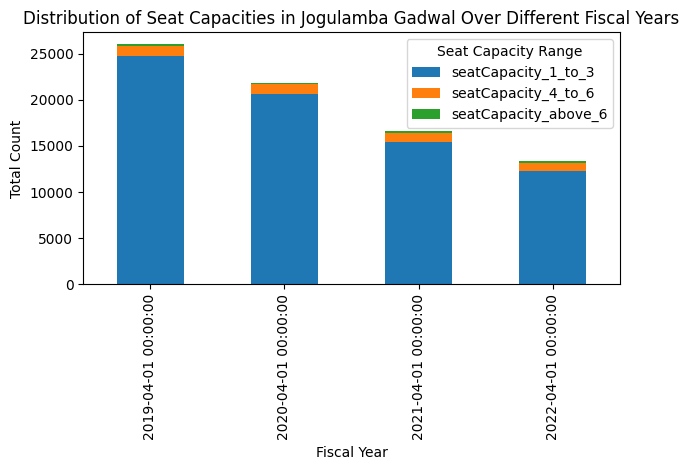

<Figure size 1000x600 with 0 Axes>

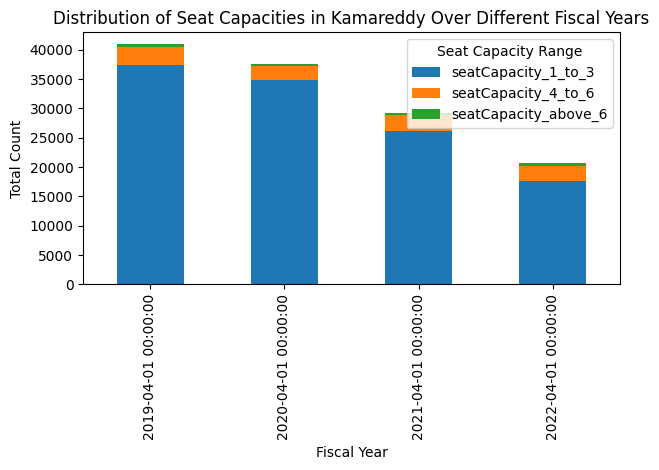

<Figure size 1000x600 with 0 Axes>

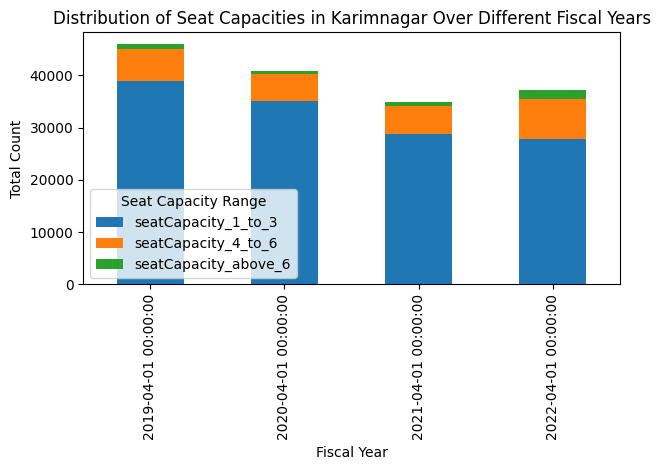

<Figure size 1000x600 with 0 Axes>

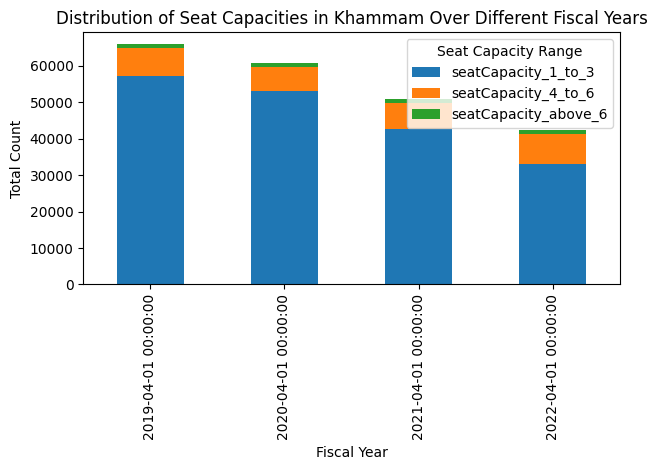

<Figure size 1000x600 with 0 Axes>

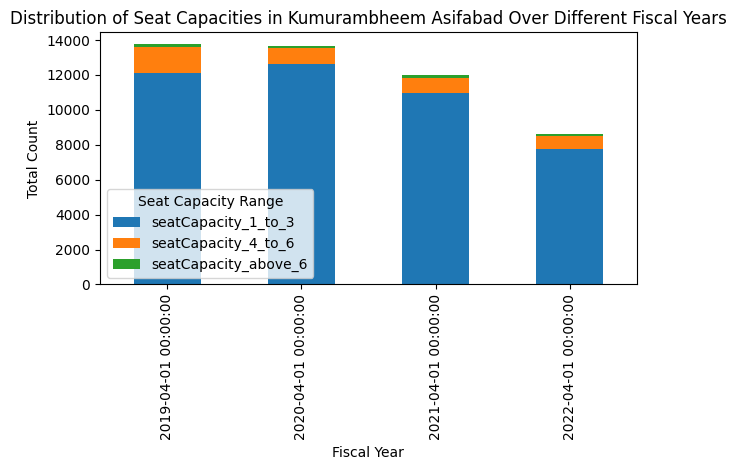

<Figure size 1000x600 with 0 Axes>

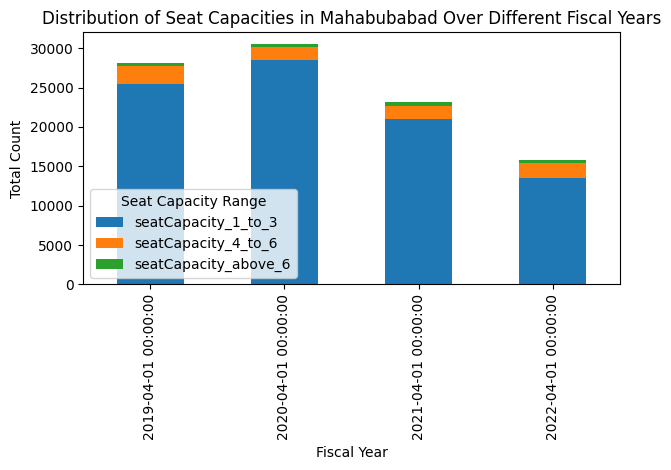

<Figure size 1000x600 with 0 Axes>

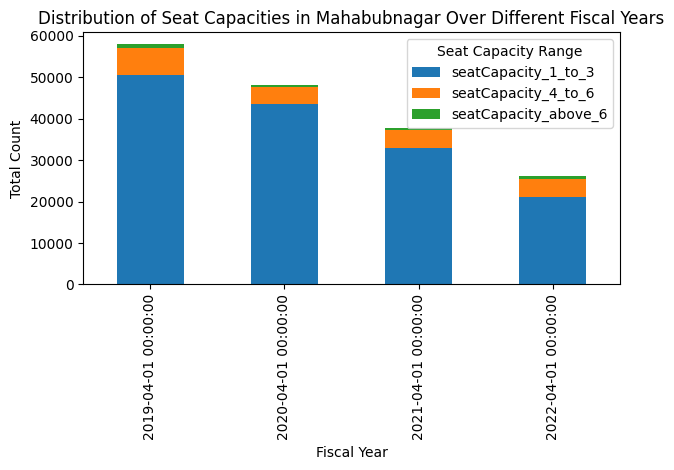

<Figure size 1000x600 with 0 Axes>

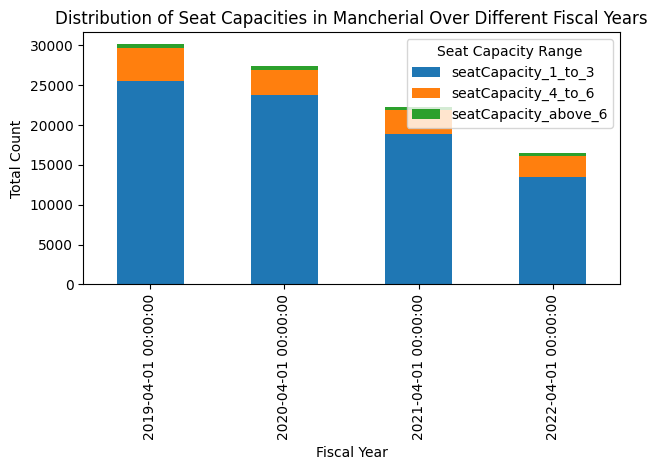

<Figure size 1000x600 with 0 Axes>

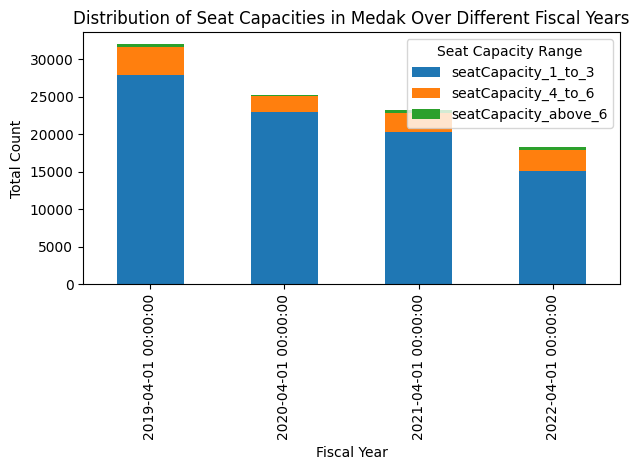

<Figure size 1000x600 with 0 Axes>

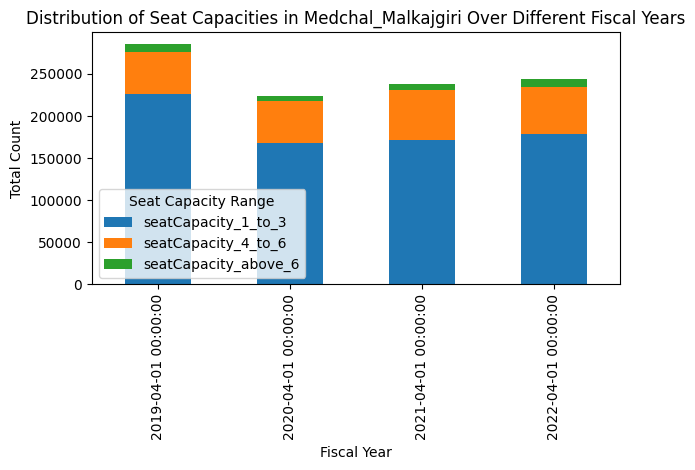

<Figure size 1000x600 with 0 Axes>

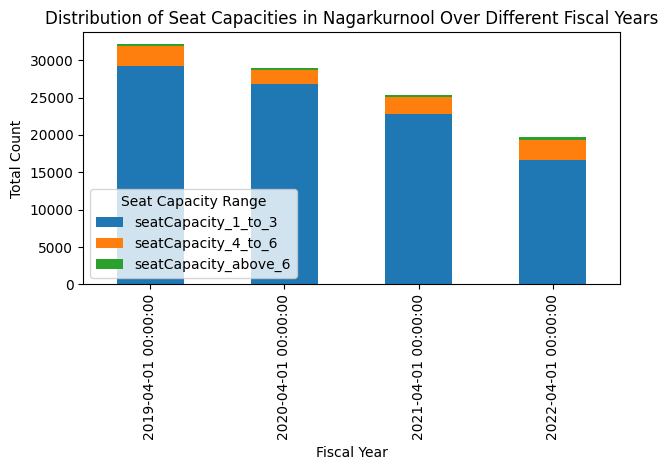

<Figure size 1000x600 with 0 Axes>

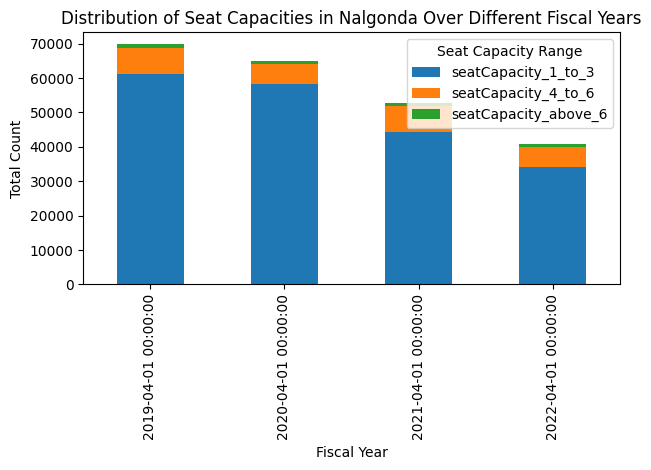

<Figure size 1000x600 with 0 Axes>

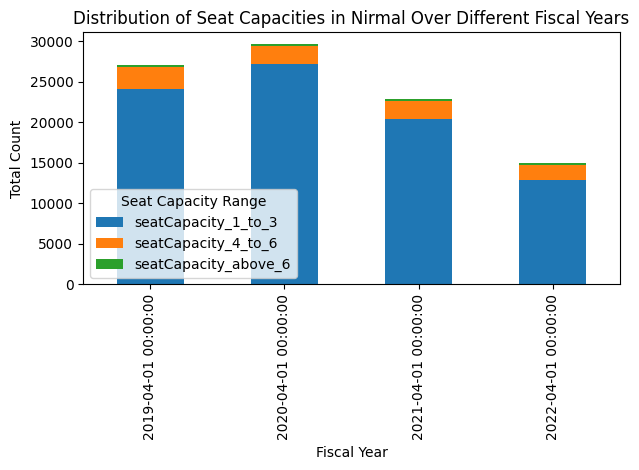

<Figure size 1000x600 with 0 Axes>

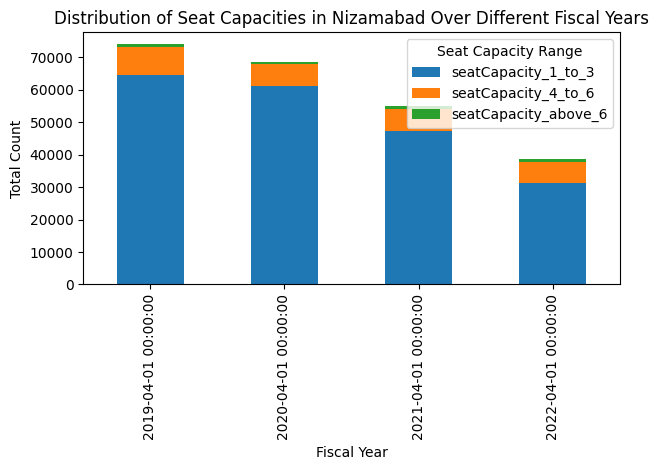

<Figure size 1000x600 with 0 Axes>

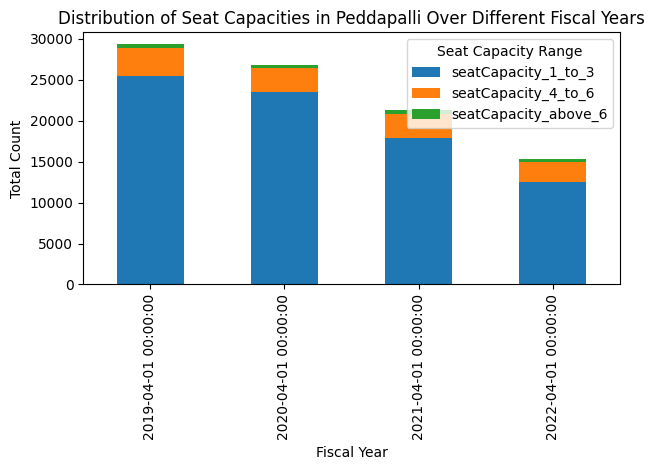

<Figure size 1000x600 with 0 Axes>

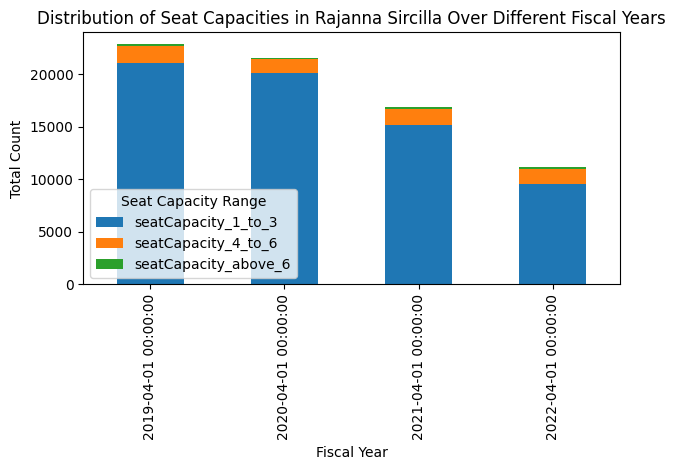

<Figure size 1000x600 with 0 Axes>

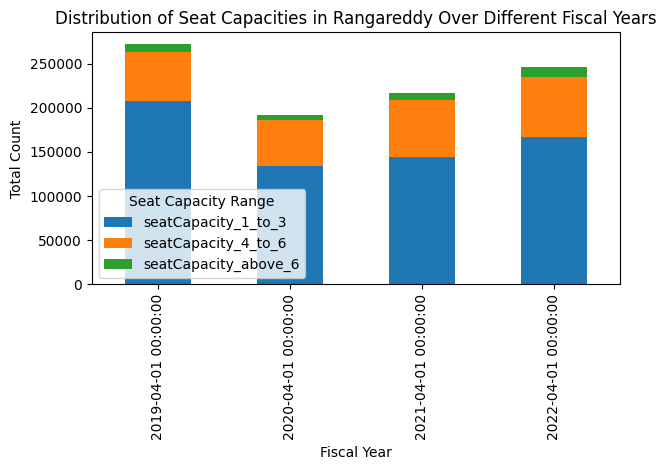

<Figure size 1000x600 with 0 Axes>

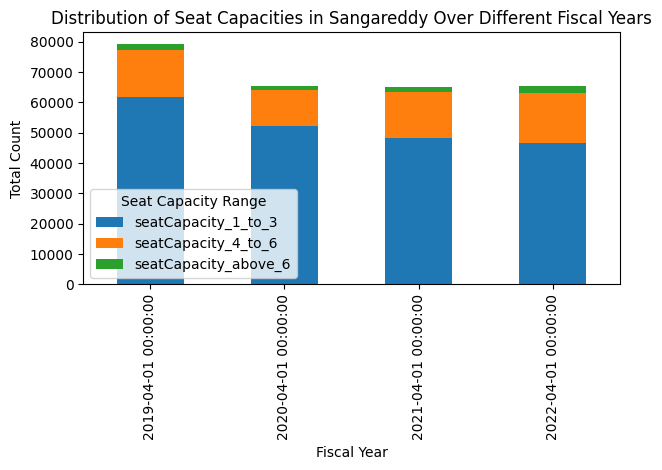

<Figure size 1000x600 with 0 Axes>

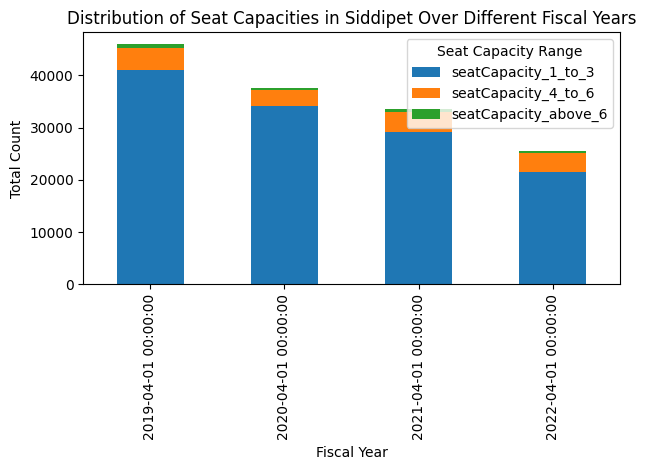

<Figure size 1000x600 with 0 Axes>

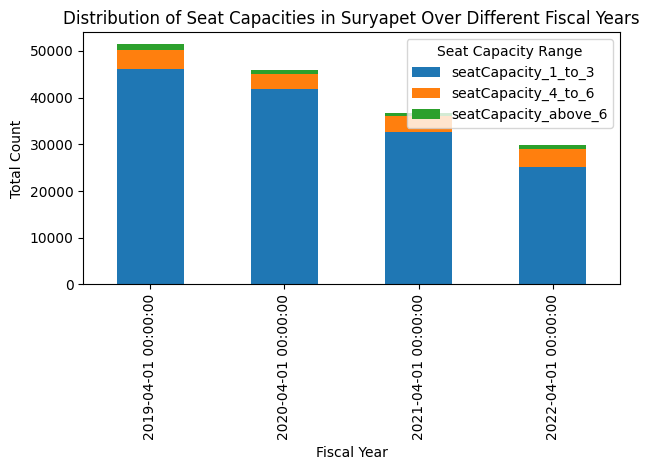

<Figure size 1000x600 with 0 Axes>

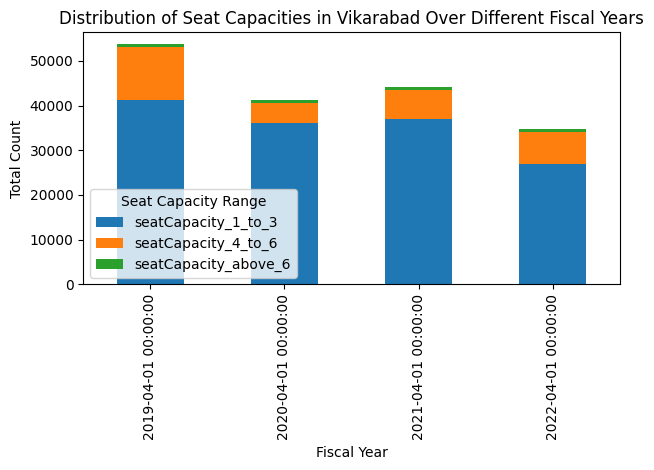

<Figure size 1000x600 with 0 Axes>

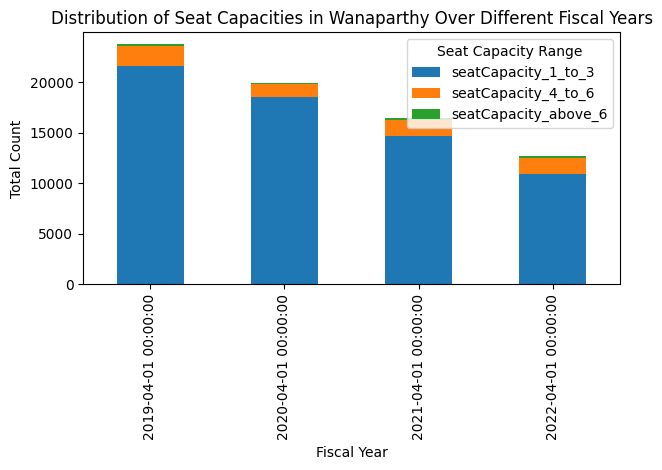

<Figure size 1000x600 with 0 Axes>

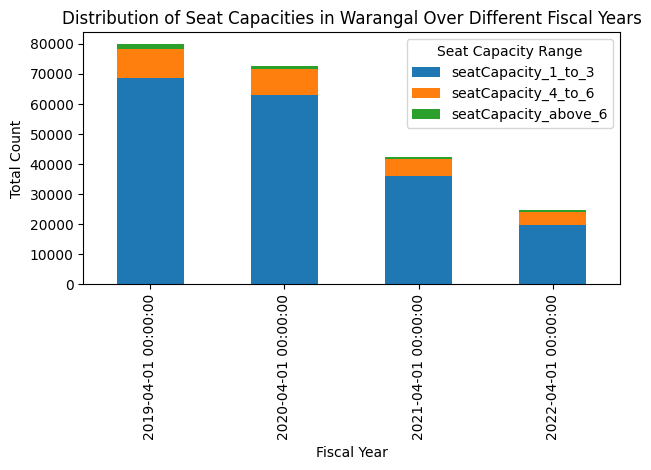

<Figure size 1000x600 with 0 Axes>

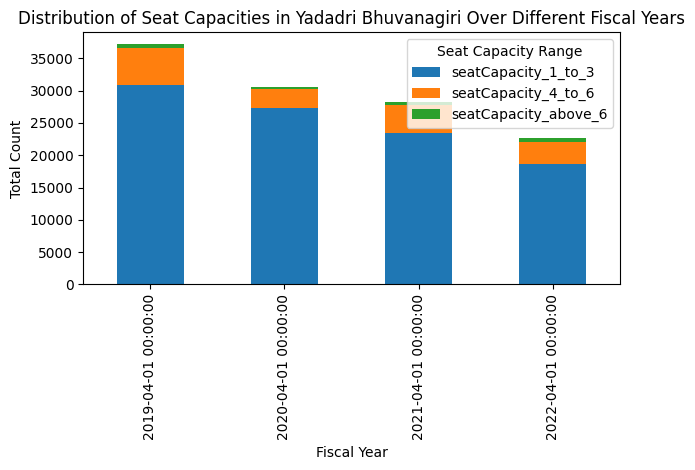

In [ ]:
for district in unique_districts:
    district_data = district_year_grouped.loc[district]
    plt.figure(figsize=(10, 6))
    district_data.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of Seat Capacities in {district} Over Different Fiscal Years')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Total Count')
    plt.xticks(rotation=90)
    plt.legend(title='Seat Capacity Range')
    plt.tight_layout()
    plt.show()

In [ ]:
# Merge vehicle seat capacity data with geospatial data
merged_data = districts_geo.merge(merge_trans, on='district', how='left')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24136\3901364609.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


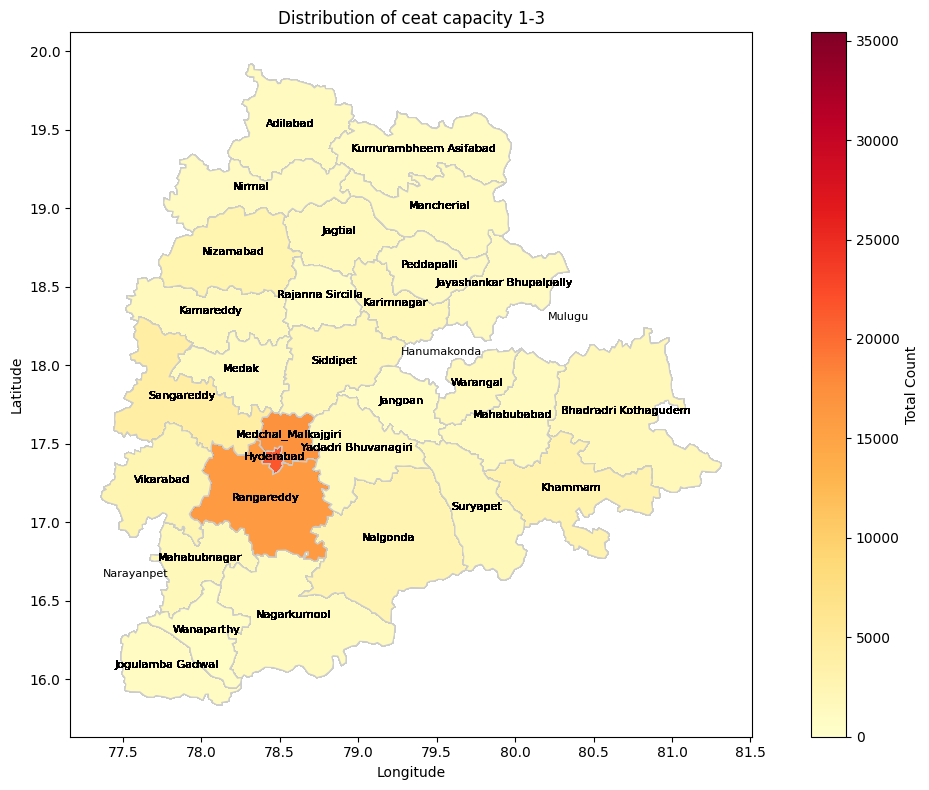

In [ ]:
vehicle_ceat_capacity_columns = ['seatCapacity_1_to_3', 'seatCapacity_4_to_6',
       'seatCapacity_above_6']

# Create a choropleth map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column=vehicle_class_columns[0], cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Distribution of ceat capacity 1-3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Add a legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data[vehicle_class_columns[0]].min(), vmax=merged_data[vehicle_class_columns[0]].max()))
sm._A = []
merged_data.apply(lambda x: ax.annotate(text=x.district, xy=x.geometry.centroid.coords[0], fontsize=8, ha='center'), axis=1)

cbar = plt.colorbar(sm)
cbar.set_label('Total Count')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24136\3323126138.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


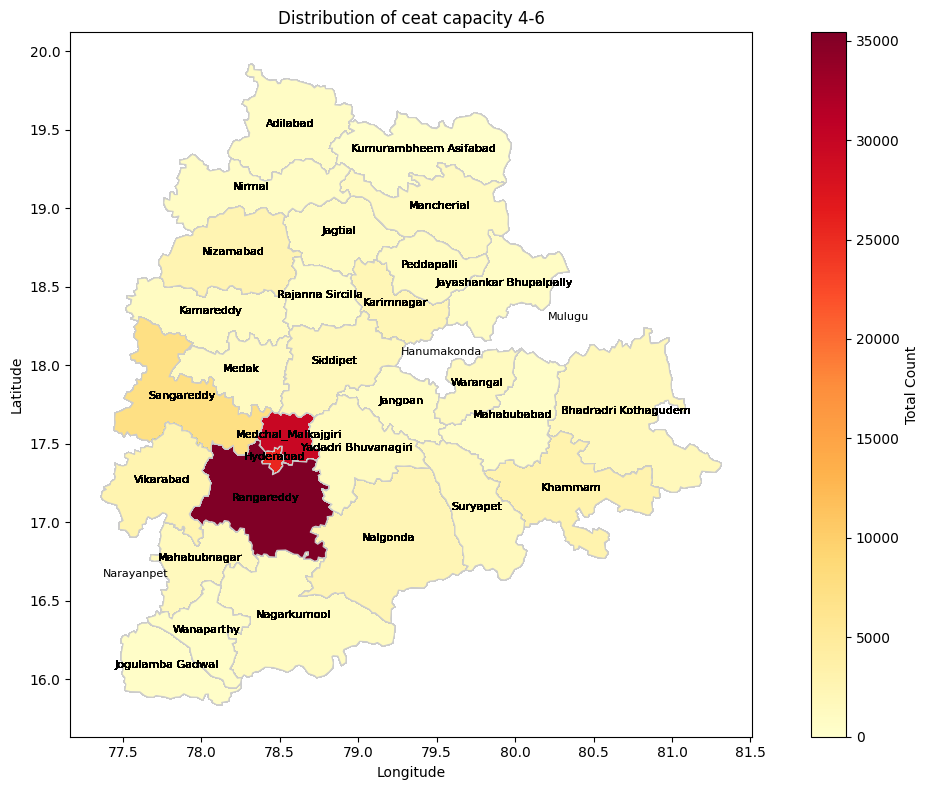

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column=vehicle_class_columns[1], cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Distribution of ceat capacity 4-6')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Add a legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data[vehicle_class_columns[0]].min(), vmax=merged_data[vehicle_class_columns[0]].max()))
sm._A = []
merged_data.apply(lambda x: ax.annotate(text=x.district, xy=x.geometry.centroid.coords[0], fontsize=8, ha='center'), axis=1)

cbar = plt.colorbar(sm)
cbar.set_label('Total Count')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24136\3611364913.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


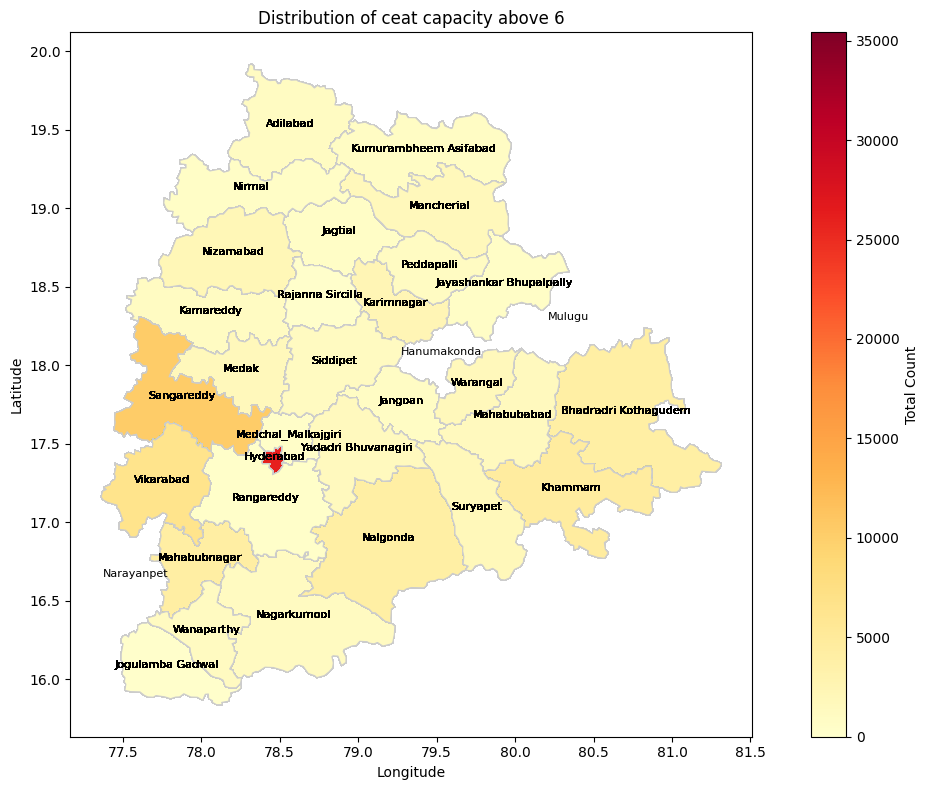

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column=vehicle_class_columns[2], cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Distribution of ceat capacity above 6')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Add a legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data[vehicle_class_columns[0]].min(), vmax=merged_data[vehicle_class_columns[0]].max()))
sm._A = []
merged_data.apply(lambda x: ax.annotate(text=x.district, xy=x.geometry.centroid.coords[0], fontsize=8, ha='center'), axis=1)

cbar = plt.colorbar(sm)
cbar.set_label('Total Count')

plt.show()

<Figure size 1000x600 with 0 Axes>

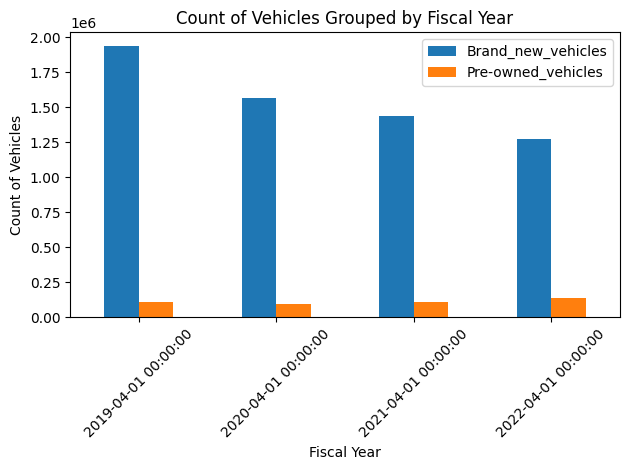

In [ ]:
# Group data by fiscal year and calculate the sum of vehicle counts
df_grouped = merge_trans.groupby('fiscal_year')[['Brand_new_vehicles', 'Pre-owned_vehicles']].sum()

# Create a bar chart grouped by fiscal year
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar')
plt.title('Count of Vehicles Grouped by Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Count of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# List of all fuel types
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']

for fuel_type in fuel_types:
    # Group data by districts and months or seasons, and calculate the sum of vehicle sales for the current fuel type
    df_grouped = merge_trans.groupby(['district', 'month'])[fuel_type].sum().reset_index()

    # Create a pivot table for the heatmap
    pivot_table = df_grouped.pivot(index='month', columns='district', values=fuel_type)

In [39]:
for fuel_type in fuel_types:
    # Group data by districts and months or seasons, and calculate the sum of vehicle sales for the current fuel type
    df_grouped = merge_trans.groupby(['district', 'month'])[fuel_type].sum().reset_index()

    # Calculate statistics
    stats = df_grouped.groupby('month')[fuel_type].describe()

    # Print statistics
    print(f"Statistics for {fuel_type.capitalize()} Vehicle Sales:")
    print(stats)

Statistics for Fuel_type_petrol Vehicle Sales:
            count         mean          std     min      25%     50%      75%  \
month                                                                           
2019-04-01   30.0  4689.800000  5575.539333  1149.0  1972.25  2907.0  4629.50   
2019-05-01   30.0  4781.200000  5630.853824   963.0  1875.75  2876.5  4947.50   
2019-06-01   30.0  4716.466667  6364.232011   741.0  1747.25  2824.0  4261.75   
2019-07-01   30.0  4381.633333  5984.902019   717.0  1589.50  2554.0  3980.00   
2019-08-01   30.0  4226.233333  6089.306385   573.0  1424.00  2208.0  3509.25   
2019-09-01   30.0  3311.600000  4626.002740   479.0  1183.75  1829.0  2589.25   
2019-10-01   30.0  7300.800000  9510.544842  1260.0  2727.75  3976.0  6763.25   
2019-11-01   30.0  4970.733333  6424.238895   977.0  2169.50  2720.0  3876.75   
2019-12-01   30.0  3959.733333  5204.222423   752.0  1452.00  2310.5  3220.25   
2020-01-01   30.0  4259.133333  5163.891708  1014.0  1615.00  

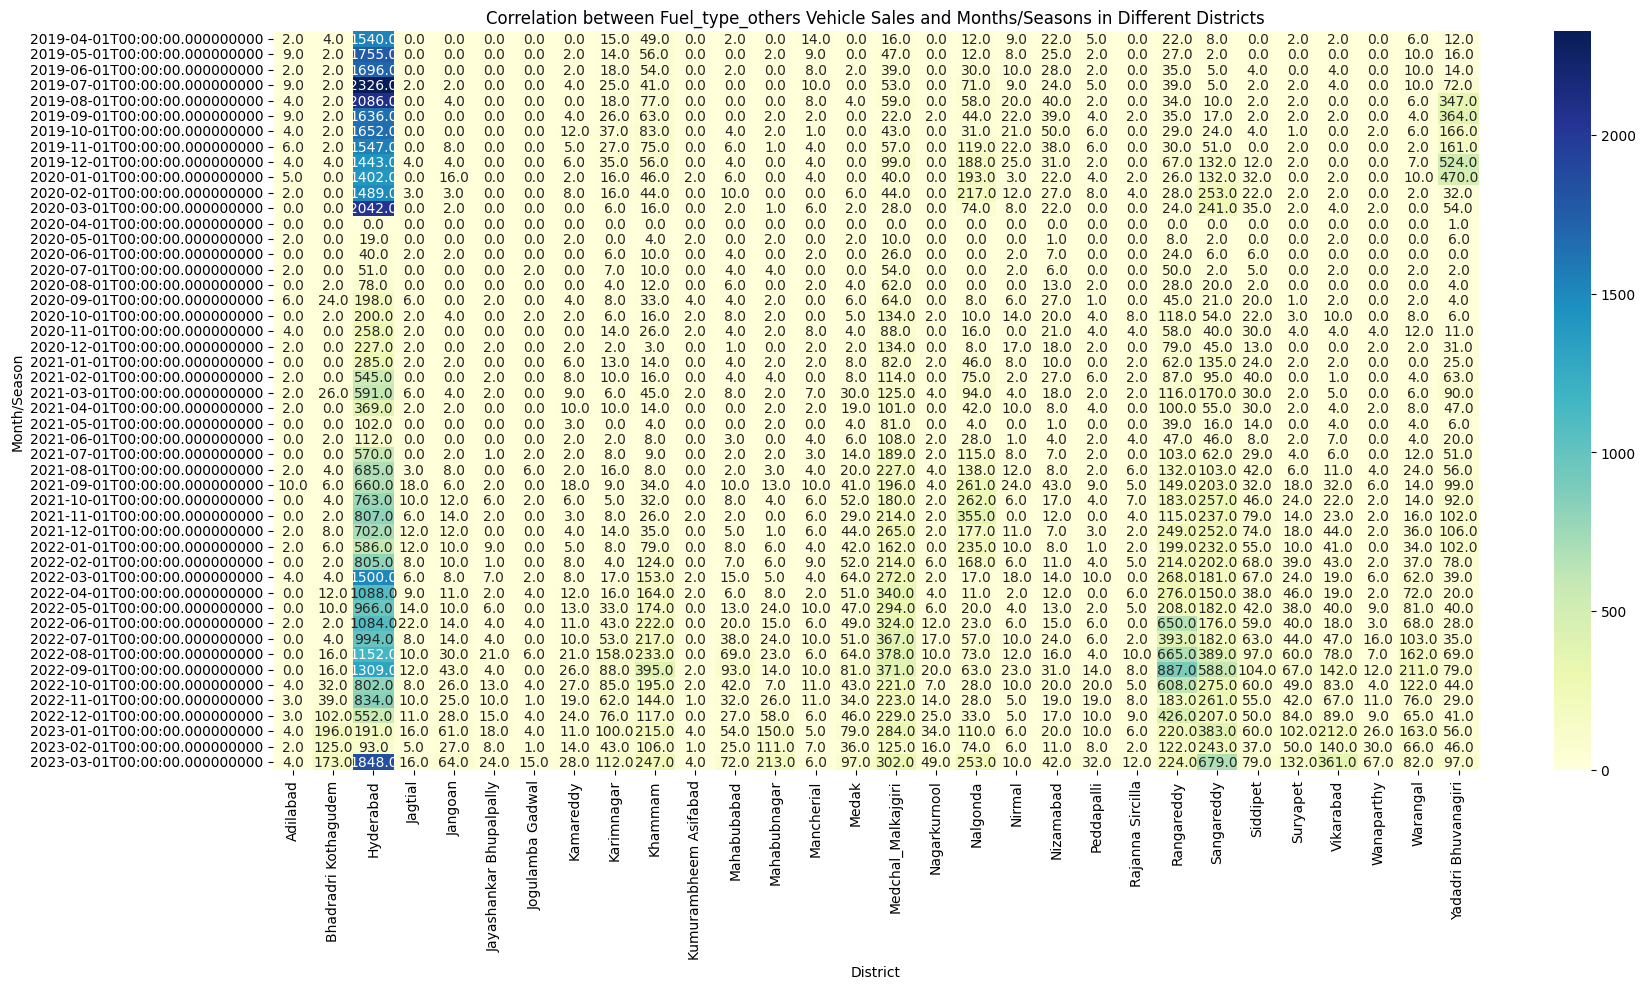

In [43]:
# Create the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title(f'Correlation between {fuel_type.capitalize()} Vehicle Sales and Months/Seasons in Different Districts')
plt.xlabel('District')
plt.ylabel('Month/Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

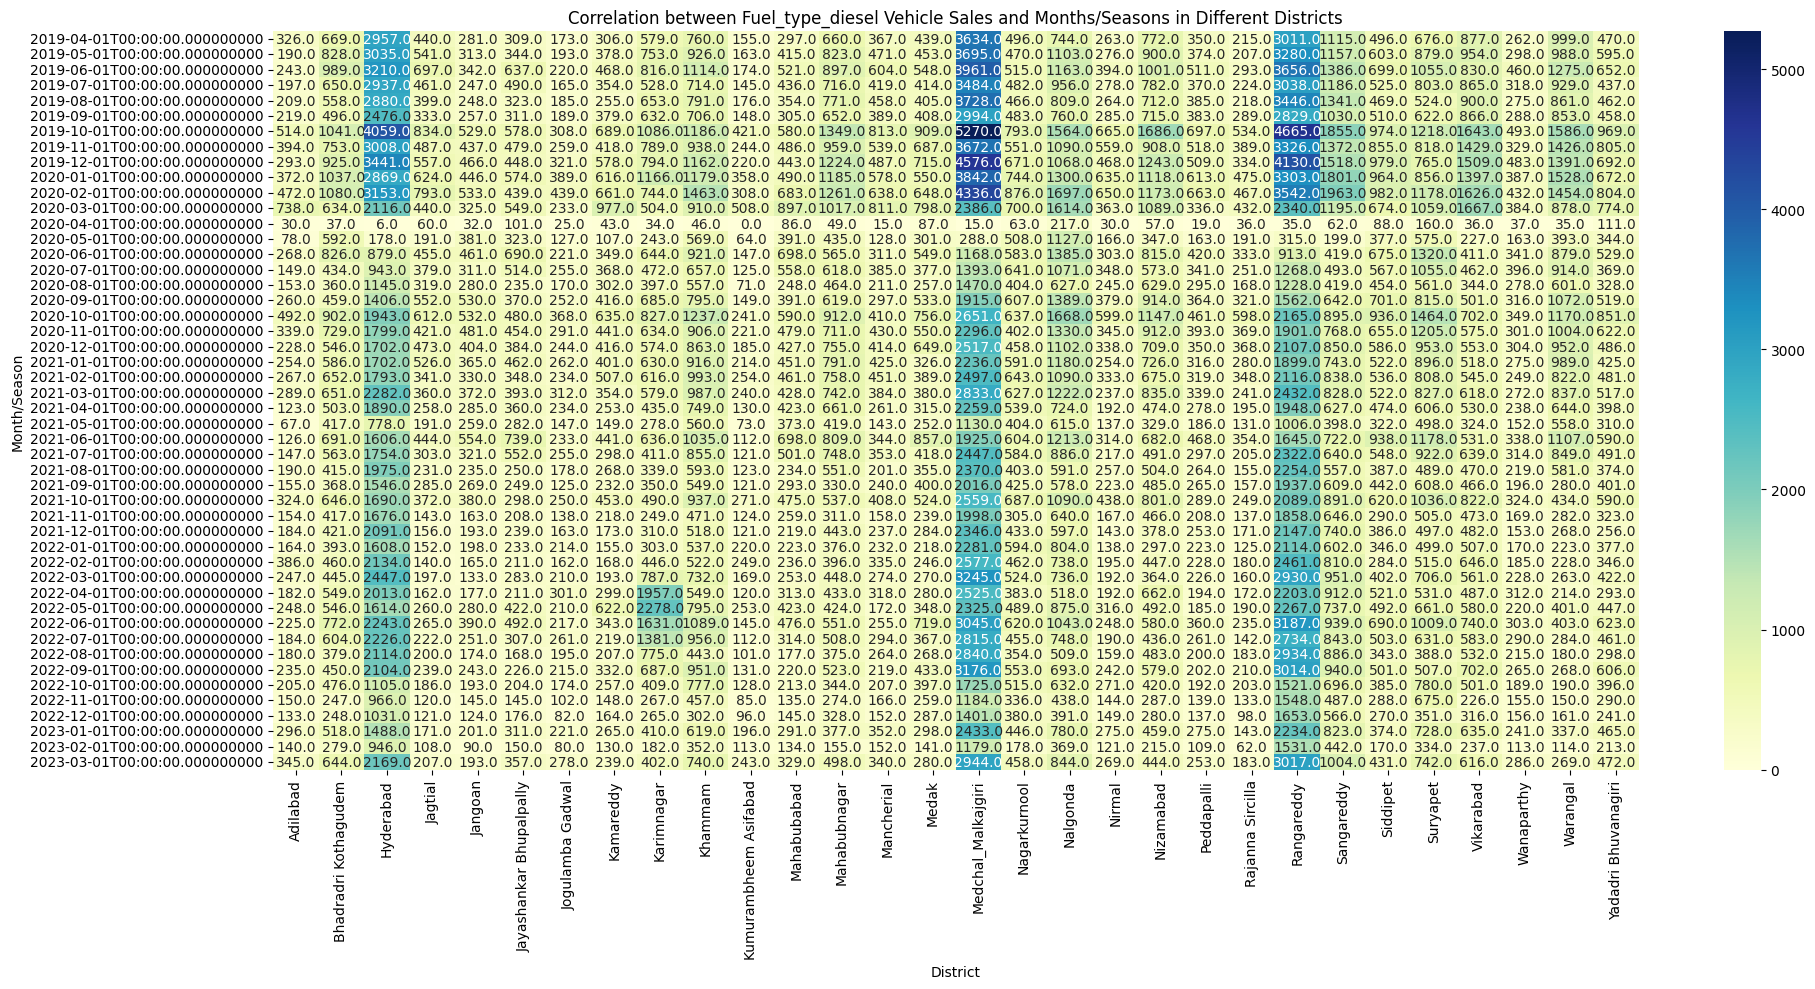

In [50]:
# Group data by districts and months or seasons, and calculate the sum of vehicle sales for the Fuel-Type category
fuel_type = 'fuel_type_diesel' 
df_grouped = merge_trans.groupby(['district', 'month'])[fuel_type].sum().reset_index()

# Create a heatmap to visualize the correlation between vehicle sales and months/seasons
plt.figure(figsize=(20, 10))
# Create a pivot table to reshape the data
pivot_table = df_grouped.pivot(index='month', columns='district', values=fuel_type)
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title(f'Correlation between {fuel_type.capitalize()} Vehicle Sales and Months/Seasons in Different Districts')
plt.xlabel('District')
plt.ylabel('Month/Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

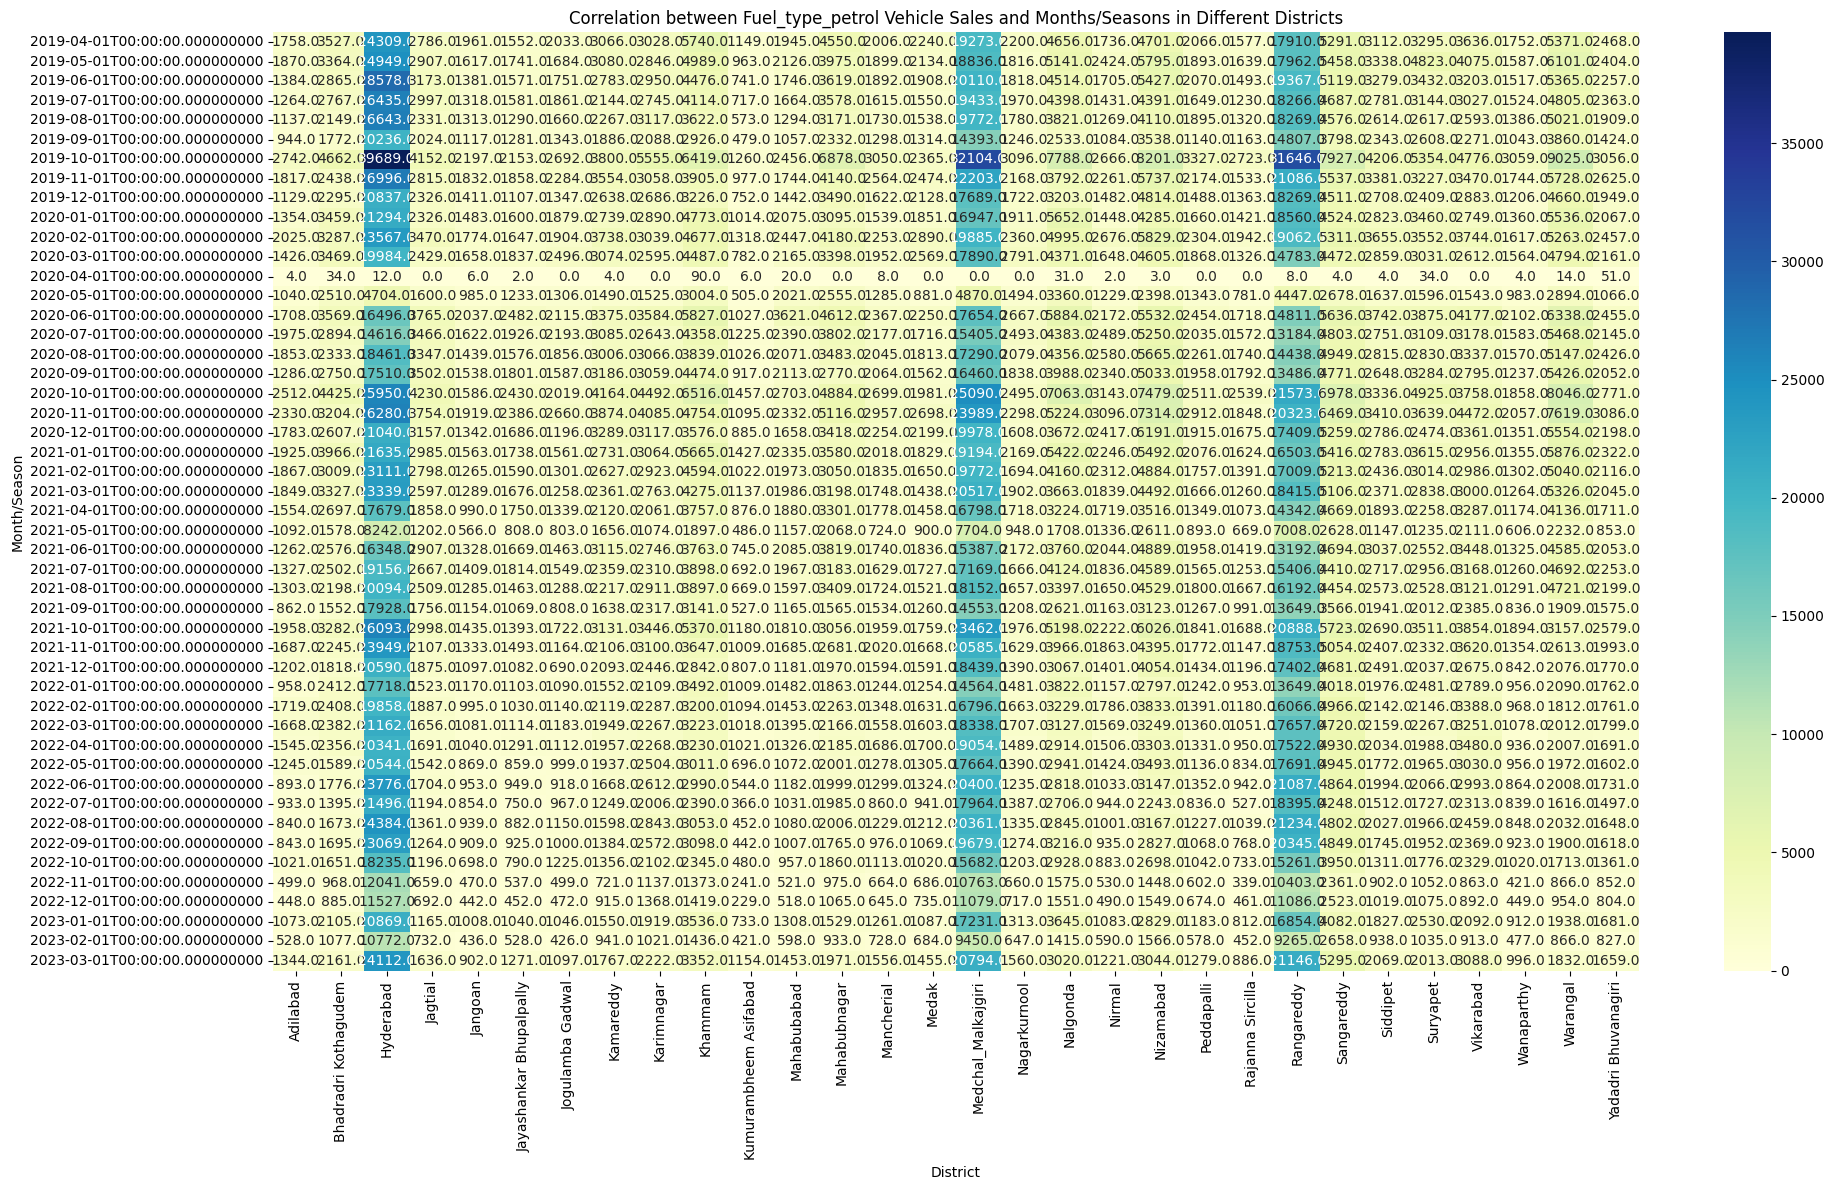

In [52]:
fuel_type = 'fuel_type_petrol' 
df_grouped = merge_trans.groupby(['district', 'month'])[fuel_type].sum().reset_index()

# Create a heatmap to visualize the correlation between vehicle sales and months/seasons
plt.figure(figsize=(20, 12))
# Create a pivot table to reshape the data
pivot_table = df_grouped.pivot(index='month', columns='district', values=fuel_type)
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title(f'Correlation between {fuel_type.capitalize()} Vehicle Sales and Months/Seasons in Different Districts')
plt.xlabel('District')
plt.ylabel('Month/Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

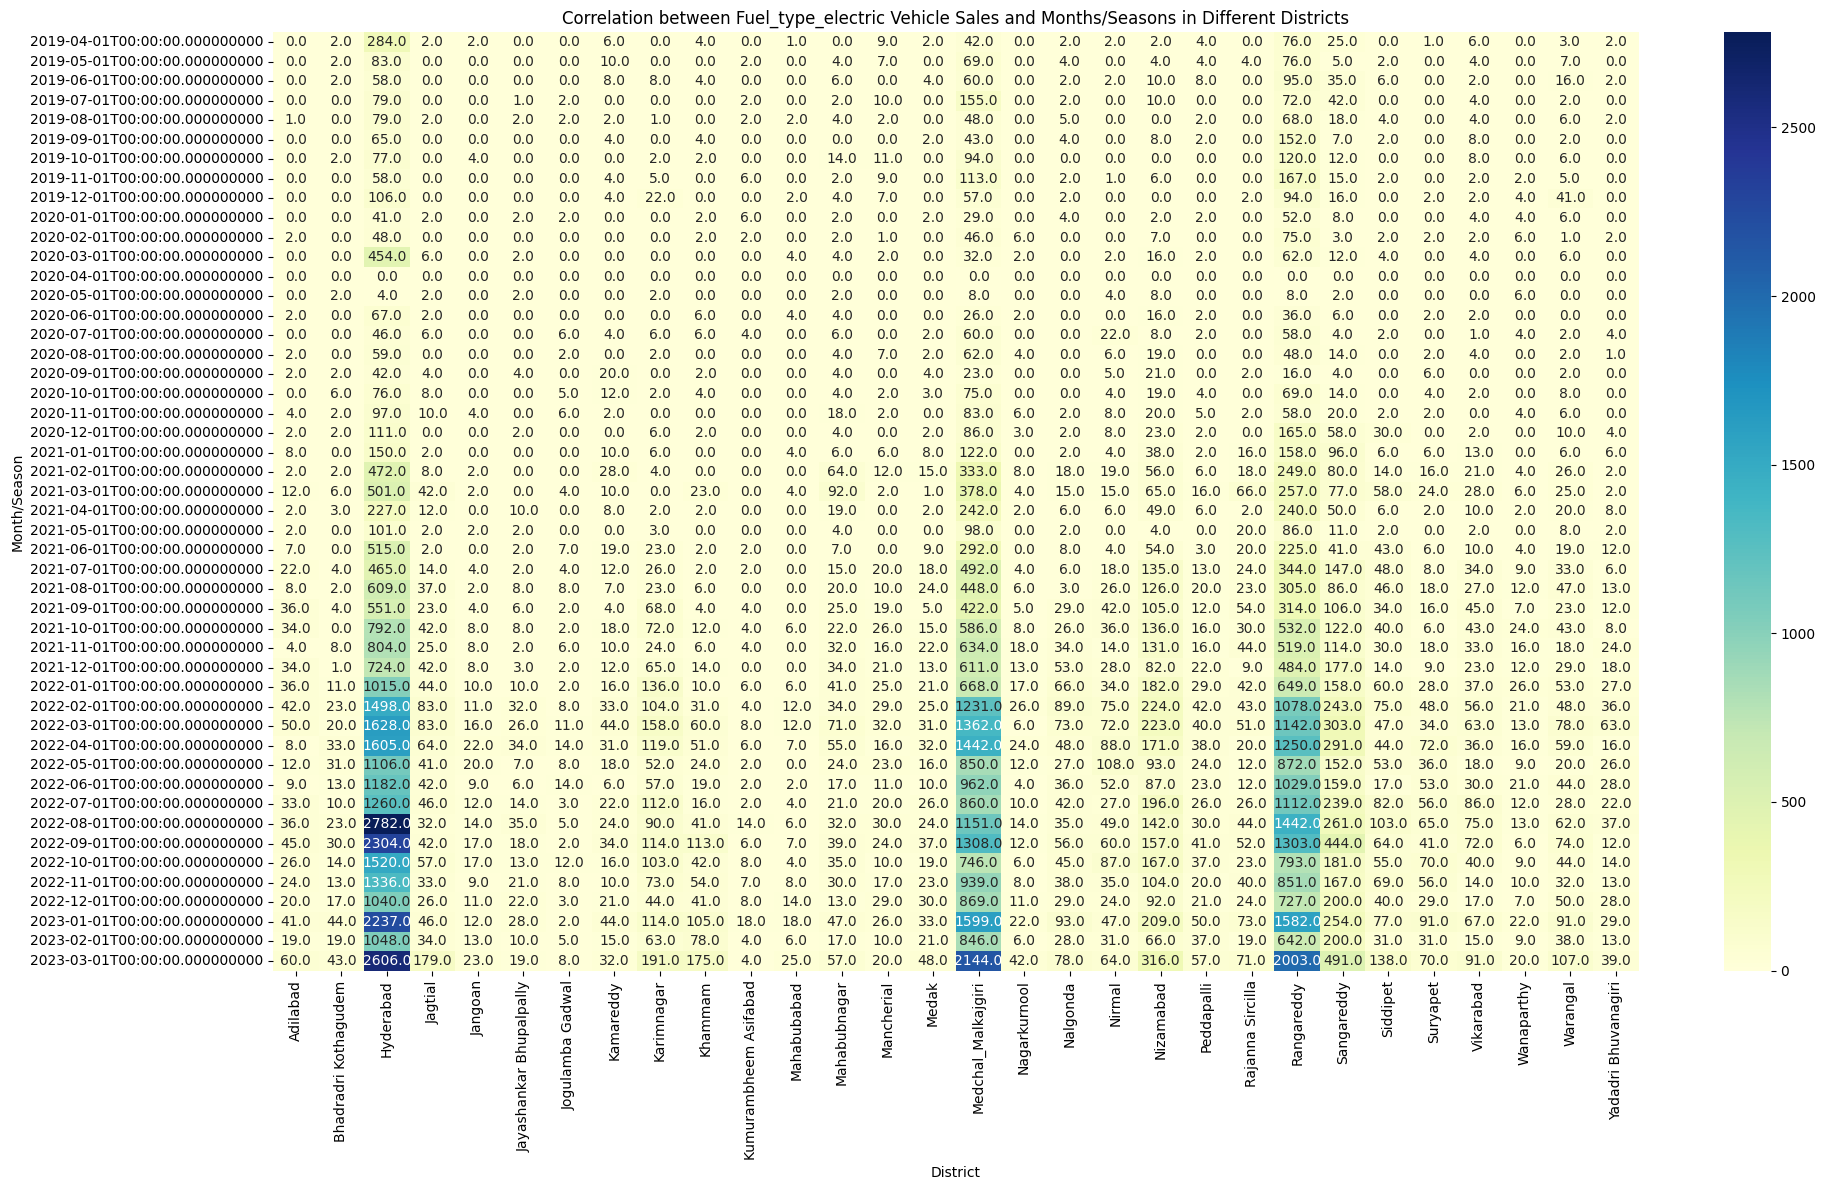

In [51]:
fuel_type = 'fuel_type_electric' 
df_grouped = merge_trans.groupby(['district', 'month'])[fuel_type].sum().reset_index()

# Create a heatmap to visualize the correlation between vehicle sales and months/seasons
plt.figure(figsize=(20, 12))
# Create a pivot table to reshape the data
pivot_table = df_grouped.pivot(index='month', columns='district', values=fuel_type)
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title(f'Correlation between {fuel_type.capitalize()} Vehicle Sales and Months/Seasons in Different Districts')
plt.xlabel('District')
plt.ylabel('Month/Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
# Filter data for FY 2022
start_date = pd.Timestamp('2022-04-01')
end_date = pd.Timestamp('2023-03-01')

In [63]:
df_fy2022 = merge_trans[(merge_trans['month'] >= start_date) & (merge_trans['month'] <= end_date)]

In [64]:
# Group data by district and calculate the sum of vehicle class columns
vehicle_class_columns = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']
df_grouped = df_fy2022.groupby('district')[vehicle_class_columns].sum().reset_index()


In [65]:
df_grouped 

district  vehicleClass_MotorCycle  vehicleClass_MotorCar  \
0                  Adilabad                  10410.0                 1416.0   
1      Bhadradri Kothagudem                  17022.0                 3157.0   
2                 Hyderabad                 206819.0                51447.0   
3                   Jagtial                  13639.0                 2055.0   
4                   Jangoan                   8617.0                 1177.0   
5   Jayashankar Bhupalpally                   9225.0                 1343.0   
6          Jogulamba Gadwal                  10300.0                  899.0   
7                 Kamareddy                  15184.0                 2153.0   
8                Karimnagar                  19411.0                 4818.0   
9                   Khammam                  27385.0                 5880.0   
10    Kumurambheem Asifabad                   6433.0                  479.0   
11              Mahabubabad                  11046.0                 1155.0   
12             Mahabubnagar                  17977.0                 3300.0   
13               Mancherial                  11603.0                 2218.0   
14                    Medak                  11663.0                 2347.0   
15       Medchal_Malkajgiri                 164626.0                61071.0   
16             Nagarkurnool                  12229.0                 2066.0   
17                 Nalgonda                  27942.0                 4927.0   
18                   Nirmal                  10984.0                 1581.0   
19                Nizamabad                  28105.0                 5824.0   
20               Peddapalli                  10818.0                 2205.0   
21         Rajanna Sircilla                   8007.0                 1376.0   
22               Rangareddy                 154186.0                71832.0   
23               Sangareddy                  40784.0                14565.0   
24                 Siddipet                  17401.0                 3254.0   
25                 Suryapet                  19165.0                 3038.0   
26                Vikarabad                  23116.0                 5211.0   
27               Wanaparthy                   8771.0                 1194.0   
28                 Warangal                  17770.0                 2937.0   
29      Yadadri Bhuvanagiri                  14471.0                 3216.0   

    vehicleClass_AutoRickshaw  vehicleClass_Agriculture  
0                       368.0                     467.0  
1                      1388.0                    2013.0  
2                      8397.0                      20.0  
3                       272.0                     858.0  
4                       397.0                    1225.0  
5                       218.0                    1928.0  
6                       116.0                     868.0  
7                       379.0                     748.0  
8                      1042.0                     999.0  
9                      2690.0                    2121.0  
10                      286.0                     160.0  
11                      680.0                     906.0  
12                     1130.0                     937.0  
13                      550.0                     400.0  
14                      610.0                    1579.0  
15                       83.0                     261.0  
16                      366.0                    1556.0  
17                      964.0                    2599.0  
18                      295.0                     989.0  
19                     1011.0                    1181.0  
20                      382.0                     705.0  
21                      148.0                     675.0  
22                       69.0                     449.0  
23                     3381.0                    1570.0  
24                      524.0                    2437.0  
25                      739.0                    2188.0  
26 

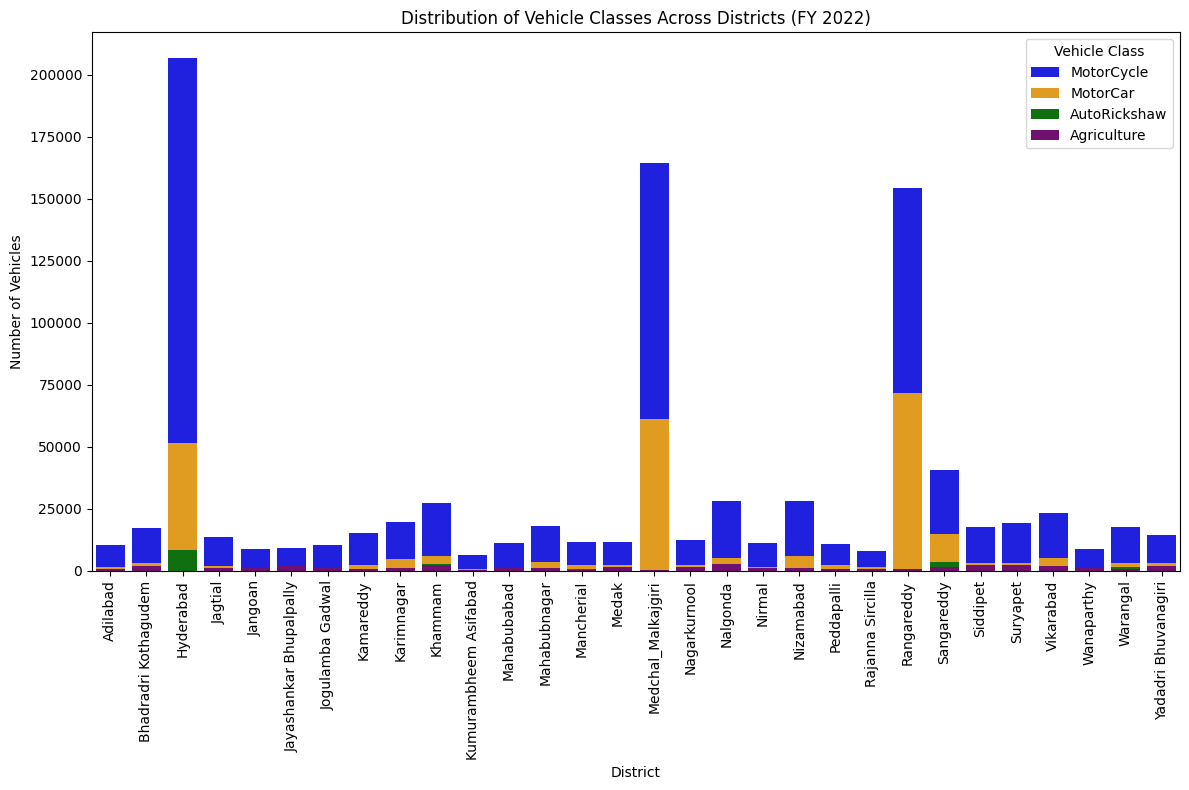

In [66]:
# Create a stacked bar chart to visualize the distribution of vehicle classes across districts
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='district', y=vehicle_class_columns[0], color='blue', label='MotorCycle')
sns.barplot(data=df_grouped, x='district', y=vehicle_class_columns[1], color='orange', label='MotorCar')
sns.barplot(data=df_grouped, x='district', y=vehicle_class_columns[2], color='green', label='AutoRickshaw')
sns.barplot(data=df_grouped, x='district', y=vehicle_class_columns[3], color='purple', label='Agriculture')
plt.title('Distribution of Vehicle Classes Across Districts (FY 2022)')
plt.xlabel('District')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.legend(title='Vehicle Class')
plt.tight_layout()
plt.show()

In [116]:
import warnings
warnings.filterwarnings("ignore")

In [151]:
# Filter data for FY 2022
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2023-03-31')
fy_2022_data = merge_trans[(merge_trans['month'] >= start_date) & (merge_trans['month'] <= end_date)]

In [ ]:
# Calculate total vehicle sales for each district and fuel type
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']
district_sales = fy_2022_data.groupby('district')[fuel_types].sum()

# Calculate total vehicle sales for all fuel types
district_sales['total_sales'] = district_sales[fuel_types].sum(axis=1)

# Find top 3 and bottom 3 districts for each fuel type
top_petrol = district_sales.nlargest(3, 'fuel_type_petrol')
bottom_petrol = district_sales.nsmallest(3, 'fuel_type_petrol')

top_diesel = district_sales.nlargest(3, 'fuel_type_diesel')
bottom_diesel = district_sales.nsmallest(3, 'fuel_type_diesel')

top_electric = district_sales.nlargest(3, 'fuel_type_electric')
bottom_electric = district_sales.nsmallest(3, 'fuel_type_electric')

In [171]:
# Print the results
print("Top 3 Districts for Petrol Vehicle Sales in 2022:")
top_petrol

Top 3 Districts for Petrol Vehicle Sales in 2022:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                     
Hyderabad                   228817.0           21195.0              8929.0   
Medchal_Malkajgiri          201947.0           27153.0              7086.0   
Rangareddy                  184204.0           24711.0              5918.0   

                    total_sales  
district                         
Hyderabad              258941.0  
Medchal_Malkajgiri     236186.0  
Rangareddy             214833.0

In [170]:
print("\nBottom 3 Districts for Petrol Vehicle Sales in 2022:")
bottom_petrol


Bottom 3 Districts for Petrol Vehicle Sales in 2022:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                        
Kumurambheem Asifabad           10112.0            1834.0                34.0   
Wanaparthy                      13584.0            2686.0               146.0   
Jangoan                         13843.0            3155.0                73.0   

                       total_sales  
district                            
Kumurambheem Asifabad      11980.0  
Wanaparthy                 16416.0  
Jangoan                    17071.0

In [169]:
print("\nTop 3 Districts for Diesel Vehicle Sales in 2022:")
top_diesel




Top 3 Districts for Diesel Vehicle Sales in 2022:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                     
Medchal_Malkajgiri          201947.0           27153.0              7086.0   
Rangareddy                  184204.0           24711.0              5918.0   
Hyderabad                   228817.0           21195.0              8929.0   

                    total_sales  
district                         
Medchal_Malkajgiri     236186.0  
Rangareddy             214833.0  
Hyderabad              258941.0

In [168]:
print("\nBottom 3 Districts for Diesel Vehicle Sales in2022:")
bottom_diesel


Bottom 3 Districts for Diesel Vehicle Sales in2022:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                        
Kumurambheem Asifabad           10112.0            1834.0                34.0   
Rajanna Sircilla                14287.0            2219.0               362.0   
Adilabad                        16592.0            2267.0               277.0   

                       total_sales  
district                            
Kumurambheem Asifabad      11980.0  
Rajanna Sircilla           16868.0  
Adilabad                   19136.0

In [172]:
print("\nTop 3 Districts for Electric Vehicle Sales in 2022:")
top_electric


Top 3 Districts for Electric Vehicle Sales in 2022:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                     
Hyderabad                   228817.0           21195.0              8929.0   
Medchal_Malkajgiri          201947.0           27153.0              7086.0   
Rangareddy                  184204.0           24711.0              5918.0   

                    total_sales  
district                         
Hyderabad              258941.0  
Medchal_Malkajgiri     236186.0  
Rangareddy             214833.0

In [166]:
print("\nBottom 3 Districts for Electric Vehicle Sales in 2022:")
bottom_electric


Bottom 3 Districts for Electric Vehicle Sales in 2022:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                        
Kumurambheem Asifabad           10112.0            1834.0                34.0   
Mahabubabad                     18857.0            4187.0                36.0   
Jogulamba Gadwal                14239.0            2309.0                52.0   

                       total_sales  
district                            
Kumurambheem Asifabad      11980.0  
Mahabubabad                23080.0  
Jogulamba Gadwal           16600.0

In [156]:
# Filter data for FY 2021
start_date = pd.to_datetime('2021-04-01')
end_date = pd.to_datetime('2022-03-31')
fy_2021_data = merge_trans[(merge_trans['month'] >= start_date) & (merge_trans['month'] <= end_date)]

In [157]:
# Calculate total vehicle sales for each district and fuel type
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']
district_sales = fy_2021_data.groupby('district')[fuel_types].sum()

# Calculate total vehicle sales for all fuel types
district_sales['total_sales'] = district_sales[fuel_types].sum(axis=1)

# Find top 3 and bottom 3 districts for each fuel type
top_petrol = district_sales.nlargest(3, 'fuel_type_petrol')
bottom_petrol = district_sales.nsmallest(3, 'fuel_type_petrol')

top_diesel = district_sales.nlargest(3, 'fuel_type_diesel')
bottom_diesel = district_sales.nsmallest(3, 'fuel_type_diesel')

top_electric = district_sales.nlargest(3, 'fuel_type_electric')
bottom_electric = district_sales.nsmallest(3, 'fuel_type_electric')

In [173]:
# Print the results
print("Top 3 Districts for Petrol Vehicle Sales in 2021:")
top_petrol

Top 3 Districts for Petrol Vehicle Sales in 2021:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                     
Hyderabad                   228817.0           21195.0              8929.0   
Medchal_Malkajgiri          201947.0           27153.0              7086.0   
Rangareddy                  184204.0           24711.0              5918.0   

                    total_sales  
district                         
Hyderabad              258941.0  
Medchal_Malkajgiri     236186.0  
Rangareddy             214833.0

In [174]:
print("\nBottom 3 Districts for Petrol Vehicle Sales in 2021:")
bottom_petrol


Bottom 3 Districts for Petrol Vehicle Sales in 2021:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                        
Kumurambheem Asifabad           10112.0            1834.0                34.0   
Wanaparthy                      13584.0            2686.0               146.0   
Jangoan                         13843.0            3155.0                73.0   

                       total_sales  
district                            
Kumurambheem Asifabad      11980.0  
Wanaparthy                 16416.0  
Jangoan                    17071.0

In [175]:
print("\nTop 3 Districts for Diesel Vehicle Sales in 2021:")
top_diesel


Top 3 Districts for Diesel Vehicle Sales in 2021:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                     
Medchal_Malkajgiri          201947.0           27153.0              7086.0   
Rangareddy                  184204.0           24711.0              5918.0   
Hyderabad                   228817.0           21195.0              8929.0   

                    total_sales  
district                         
Medchal_Malkajgiri     236186.0  
Rangareddy             214833.0  
Hyderabad              258941.0

In [176]:
print("\nBottom 3 Districts for Diesel Vehicle Sales in 2021:")
bottom_diesel


Bottom 3 Districts for Diesel Vehicle Sales in 2021:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                        
Kumurambheem Asifabad           10112.0            1834.0                34.0   
Rajanna Sircilla                14287.0            2219.0               362.0   
Adilabad                        16592.0            2267.0               277.0   

                       total_sales  
district                            
Kumurambheem Asifabad      11980.0  
Rajanna Sircilla           16868.0  
Adilabad                   19136.0

In [177]:
print("\nTop 3 Districts for Electric Vehicle Sales in 2021:")
top_electric


Top 3 Districts for Electric Vehicle Sales in 2021:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                     
Hyderabad                   228817.0           21195.0              8929.0   
Medchal_Malkajgiri          201947.0           27153.0              7086.0   
Rangareddy                  184204.0           24711.0              5918.0   

                    total_sales  
district                         
Hyderabad              258941.0  
Medchal_Malkajgiri     236186.0  
Rangareddy             214833.0

In [178]:

print("\nBottom 3 Districts for Electric Vehicle Sales in 2021:")
bottom_electric


Bottom 3 Districts for Electric Vehicle Sales in 2021:


fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
district                                                                        
Kumurambheem Asifabad           10112.0            1834.0                34.0   
Mahabubabad                     18857.0            4187.0                36.0   
Jogulamba Gadwal                14239.0            2309.0                52.0   

                       total_sales  
district                            
Kumurambheem Asifabad      11980.0  
Mahabubabad                23080.0  
Jogulamba Gadwal           16600.0

In [179]:
# Filter data for FY 2021 and FY 2022
fy_2021_start = pd.to_datetime('2021-04-01')
fy_2021_end = pd.to_datetime('2022-03-31')
fy_2022_start = pd.to_datetime('2022-04-01')
fy_2022_end = pd.to_datetime('2023-03-31')

In [181]:
fy_2021_data = merge_trans[(merge_trans['month'] >= fy_2021_start) & (merge_trans['month'] <= fy_2021_end)]
fy_2022_data = merge_trans[(merge_trans['month'] >= fy_2022_start) & (merge_trans['month'] <= fy_2022_end)]

# Calculate total vehicle sales for each district and fuel type for FY 2021 and FY 2022
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']

In [182]:
fy_2021_sales = fy_2021_data.groupby('district')[fuel_types].sum()
fy_2022_sales = fy_2022_data.groupby('district')[fuel_types].sum()

# Calculate percentage change for each district and fuel type
percentage_change = (fy_2022_sales - fy_2021_sales) / fy_2021_sales * 100

# Calculate total percentage change
percentage_change['total_change'] = percentage_change[fuel_types].sum(axis=1)

# Find districts with positive growth
positive_growth_districts = percentage_change[percentage_change['total_change'] > 0]

In [184]:
# Print the districts with positive growth
print("Districts with Positive Growth in Vehicle Sales (FY 2021 to FY 2022):")
positive_growth_districts

Districts with Positive Growth in Vehicle Sales (FY 2021 to FY 2022):


fuel_type_petrol  fuel_type_diesel  \
district                                                      
Bhadradri Kothagudem           -30.086799         -0.470465   
Hyderabad                        1.026585         -5.548478   
Jangoan                        -31.228780        -21.996830   
Jayashankar Bhupalpally        -34.925260        -18.826844   
Jogulamba Gadwal               -23.372428          1.169337   
Kamareddy                      -34.588371          7.464179   
Karimnagar                     -15.477746        111.442193   
Khammam                        -25.859900         -0.347481   
Kumurambheem Asifabad          -32.960839         -6.052345   
Mahabubabad                    -36.082092        -24.289467   
Medak                          -27.405536         -6.875286   
Medchal_Malkajgiri              -0.904198          1.616764   
Nagarkurnool                   -26.047359        -13.363514   
Nalgonda                       -23.443978        -14.893617   
Nirmal                         -41.051352         -1.415997   
Peddapalli                     -31.132498        -21.287284   
Rangareddy                       8.732167         12.674517   
Sangareddy                      -7.606890         13.206396   
Siddipet                       -29.525632         -8.659680   
Suryapet                       -25.322267         -8.958928   
Vikarabad                      -27.700353         -4.588436   

                         fuel_type_electric  total_change  
district                                                   
Bhadradri Kothagudem             281.578947    251.021683  
Hyderabad                        124.280435    119.758541  
Jangoan                          145.205479     91.979869  
Jayashankar Bhupalpally          104.504505     50.752401  
Jogulamba Gadwal                  61.538462     39.335371  
Kamareddy                         49.180328     22.056136  
Karimnagar                        60.795455    156.759901  
Khammam                          409.395973    383.188593  
Kumurambheem Asifabad            138.235294     99.222111  
Mahabubabad                      180.555556    120.183997  
Medak                             72.432432     38.151611  
Medchal_Malkajgiri                93.564776     94.277342  
Nagarkurnool                      62.857143     23.446270  
Nalgonda                          40.506329      2.168734  
Nirmal                            89.295775     46.828426  
Peddapalli                        84.474886     32.055104  
Rangareddy                       129.908753    151.315437  
Sangareddy                        95.057766    100.657272  
Siddipet                          73.707865     35.522553  
Suryapet                         247.150259    212.869064  
Vikarabad                         46.475196     14.186407

In [187]:
top_growth_petrol = positive_growth_districts['fuel_type_petrol'].nlargest(3)
top_growth_petrol

district
Rangareddy            8.732167
Hyderabad             1.026585
Medchal_Malkajgiri   -0.904198
Name: fuel_type_petrol, dtype: float64

In [188]:
top_growth_diesel = positive_growth_districts['fuel_type_diesel'].nlargest(3)
top_growth_diesel

district
Karimnagar    111.442193
Sangareddy     13.206396
Rangareddy     12.674517
Name: fuel_type_diesel, dtype: float64

In [189]:
top_growth_electric= positive_growth_districts['fuel_type_electric'].nlargest(3)
top_growth_electric

district
Khammam                 409.395973
Bhadradri Kothagudem    281.578947
Suryapet                247.150259
Name: fuel_type_electric, dtype: float64